## PROJECT ID :PRCP-1009-Bank GoodCredit
### Project Members:
    1.Praveenkumareddy Undela
    2.Srinivas Reddy
    3.Noor Mahammad

## Business Case
    Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.
                           Target variable → Bad_label
                        -->0 – Customer has Good credit history
                        -->1 – Customer has Bad credit history (falls into 30 DPD + bucket)
                           Our benchmark model has gini as 37.9.
                                               

### Domain Analysis
                                         
Bank credit analysis involves verifying and determining the creditworthiness of a potential client by looking at their financial state, credit reports, and business cash flows.The goal of credit analysis is to determine the level of default risk that a client presents to the company and the losses that the bank will suffer if the client defaults.The risk level that a client presents determines whether the bank will approve or reject the loan application, and if approved, the amount to be awarded.some of the major table this data has and every tables has there own important columns which are Customers Account, Customers Demographics and Customers Enquiry.                                         

* Cust_Account :- This table contains customer’s historical accounts data and payments history.
* Cust_Demographics :- This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
* Cust_Enquiry :- Current customer applications with demographic data
* __Note__ that demographics features are renamed as features and obscured in accordance with privacy policies.

* I will explain every necesseary columns when i'll do __Data Cleaning__.


### Data Set Fields
                                              
* For getting a Dataset we have to install pymysql and mysql connector. and the help of mysql i'm going to load dataset and convert into csv file then i'm going to work on this project.                                              

### Python implimentation

In [1]:
import os               # Handling the Current Working Directory
import mysql.connector  #  mysql-connector for making connections to database server
import pandas as pd     # import pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np      # import numpy for working with mathematices part/numerical data
## visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# for ignoring warning
import warnings
warnings.filterwarnings("ignore")

##### Making connections to database server

In [2]:
connection=mysql.connector.connect(host="18.136.157.135",
                                  user="dm_team1",
                                  password="DM!$Team&279@20!")

#####  Check the number of databases available on the server

In [3]:

cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


##### connecting the database

In [4]:
connection=mysql.connector.connect(host="18.136.157.135",
                                  user="dm_team1",
                                  password="DM!$Team&279@20!",
                                  database="project_banking")

In [5]:
# getting all tables of bank goodcredit
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


In [6]:
pd.read_sql_query('show tables',connection)

Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry

In [7]:
# Replace 'your_query_here' with your actual SQL query
# Fetch data from MySQL and store it in a DataFrame
Cust_Account=pd.read_sql_query('select* from Cust_Account',connection)
Cust_Demographics=pd.read_sql_query('select * from Cust_Demographics',connection)
Cust_Enquiry=pd.read_sql_query('select * from Cust_Enquiry',connection)

In [8]:
# run a code for showing all columns
pd.set_option('display.max_columns',None)
pd.reset_option('display.max_rows',None)

In [9]:
# This table contains customer’s historical accounts data and payments history.
Cust_Account

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0       10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1       10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2       10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3       20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4       20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   
...           ...         ...        ...       ...         ...        ...   
186324  11-Jun-15        1611  25-May-15        10           1  02-May-07   
186325  11-Jun-15        1611  25-May-15        10           1  11-Apr-07   
186326  11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327  11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328  11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0          30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1          06-Sep-15               03-Oct-15           16201           10390   
2          31-Aug-15               30-Sep-15           41028           34420   
3                     26-Jul-07    31-Jan-09           93473               0   
4          05-May-15               31-May-15           20250           13500   
...              ...        ...          ...             ...             ...   
186324     21-Apr-15               30-Apr-15           24228           24228   
186325     22-Jun-09  02-Apr-10    30-Apr-15           19584               0   
186326                12-Apr-12    31-Dec-13           50844               0   
186327                07-Mar-12    15-Apr-15           35587               0   
186328                31-Dec-08    11-Jun-10           26000               0   

       amt_past_due                                    paymenthistory1  \
0                    """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1                    """0000000000000000000000000000000000000000000...   
2                    """0000000000000000000000000000000000000000000...   
3                    """1200900600600600300000000000000000000000000...   
4                                                """000000000000000"""   
...             ...                                                ...   
186324               """0000000000000000000000000000000000000000000...   
186325                               """000179146119089058029000XXX"""   
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
0                                                            01-Sep-15   
1       """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                            01-Jul-07   
4                                                            01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                       01-Apr-10   
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0         01-Jul-14                                                         
1         01-Nov-12       14000      1400                               3   
2         01-Oct-12                                                         
3         01-Feb-06                 

In [10]:
#  This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
Cust_Demographics

dt_opened customer_no entry_time        feature_1  feature_2 feature_3  \
0      18-Apr-15           1  13-Apr-15         Insignia  13-Apr-15       650   
1      21-Apr-15           2  21-Apr-15         Insignia  21-Apr-15       760   
2      22-Apr-15           3  21-Apr-15         Insignia  21-Apr-15       774   
3      25-Apr-15           4  15-Apr-15         Insignia  20-Apr-15       770   
4      06-May-15           5  30-Apr-15         Insignia                        
...          ...         ...        ...              ...        ...       ...   
23891  31-Dec-15       23892  10-Dec-15  Platinum Deligh  10-Dec-15       704   
23892  17-Dec-15       23893  16-Nov-15  Platinum Deligh                        
23893  04-Nov-15       23894  24-Sep-15  Platinum Maxima  24-Sep-15       748   
23894  03-Nov-15       23895  30-Sep-15  Platinum Deligh  30-Sep-15       740   
23895  04-Dec-15       23896  06-Nov-15  Titanium Deligh  06-Nov-15       688   

      feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
0             2  Card Setup        14    500000                       
1             1  Card Setup        14   1200000                       
2             1  Card Setup        14    700000                       
3             1  Card Setup        14    500000                       
4             3  Card Setup        14    500000                       
...         ...         ...       ...       ...       ...       ...   
23891         1  Card Setup        14    119000                       
23892         2  Card Setup        14     35000                       
23893         3  Card Setup        14     68000                       
23894         3  Card Setup        14    158000                       
23895         1  Card Setup        14    106000                       

      feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
0                         Y        IS1                     0        159   
1                         Y        IS1                     0         91   
2                         Y        IS1                     0         91   
3                         Y        IS1                     0        157   
4                         Y        IS1                     0        100   
...          ...        ...        ...        ...        ...        ...   
23891                     Y        PD1        PD3         12       SA05   
23892                     Y        PD1        PD3         12       SA03   
23893                     Y        PM1                             CD01   
23894                     Y        PD1        PD3         12       SA40   
23895                     Y        TD1                     0       SA03   

      feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
0           4284       4284                     1  ADFPNXXXXX  03-Sep-65   
1           B001       4077                     1  AJWPRXXXXX  14-Jul-62   
2           B001       4077                     2  AFAPNXXXXX  10-Apr-66   
3           5107       5107                     1  AAAPDXXXXX  16-Apr-64   
4           D016       4564                     1  ABEPSXXXXX  03-Jan-54   
...          ...        ...        ...        ...         ...        ...   
23891       MA01                                1  CUQPSXXXXX  12-Oct-88   
23892       AS33                                1  DTPPSXXXXX  01-Feb-87   
23893       D066                                1  CPOPSXXXXX  08-Nov-86   
23894       G011                                1  AVZPGXXXXX  24-Nov-82   
23895       AS33                                1  AJIPBXXXXX  15-Aug-83   

       feature_22 feature_23         feature_24 feature_25 feature_26  \
0      98332XXXXX          N    @REDIFFMAIL.COM          1          2   
1      99455XXXXX          N         @GMAIL.COM          1          2   
2      98456XXXXX          N  @SHOBANARAYAN.COM          1          0   
3      98220XXXXX          N          @VSNL.COM          1          3   
4 

In [11]:
# Current customer applications with demographic data
Cust_Enquiry

dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0       18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1       18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2       18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3       18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4       18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000
...           ...         ...        ...        ...         ...      ...
413183  04-Dec-15       23896  09-Nov-15  22-Oct-11           5   200000
413184  04-Dec-15       23896  09-Nov-15  06-Jan-11          10    50000
413185  04-Dec-15       23896  09-Nov-15  01-Apr-10          10    50000
413186  04-Dec-15       23896  09-Nov-15  21-Feb-10           1   330000
413187  04-Dec-15       23896  09-Nov-15  17-Oct-07           2   682000

[413188 rows x 6 columns]

In [12]:
# here i'm going to merge the all tables in one variables and making one dataset of two tables by using inner join
data = pd.merge(Cust_Account,Cust_Demographics,on ="customer_no",how="inner")

In [13]:
# that's we got dataset after mergeing.....
data

dt_opened_x customer_no  upload_dt acct_type owner_indic  opened_dt  \
0        10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1        10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2        10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3        20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4        20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   
...            ...         ...        ...       ...         ...        ...   
186324   11-Jun-15        1611  25-May-15        10           1  02-May-07   
186325   11-Jun-15        1611  25-May-15        10           1  11-Apr-07   
186326   11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327   11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328   11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0          30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1          06-Sep-15               03-Oct-15           16201           10390   
2          31-Aug-15               30-Sep-15           41028           34420   
3                     26-Jul-07    31-Jan-09           93473               0   
4          05-May-15               31-May-15           20250           13500   
...              ...        ...          ...             ...             ...   
186324     21-Apr-15               30-Apr-15           24228           24228   
186325     22-Jun-09  02-Apr-10    30-Apr-15           19584               0   
186326                12-Apr-12    31-Dec-13           50844               0   
186327                07-Mar-12    15-Apr-15           35587               0   
186328                31-Dec-08    11-Jun-10           26000               0   

       amt_past_due                                    paymenthistory1  \
0                    """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1                    """0000000000000000000000000000000000000000000...   
2                    """0000000000000000000000000000000000000000000...   
3                    """1200900600600600300000000000000000000000000...   
4                                                """000000000000000"""   
...             ...                                                ...   
186324               """0000000000000000000000000000000000000000000...   
186325                               """000179146119089058029000XXX"""   
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
0                                                            01-Sep-15   
1       """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                            01-Jul-07   
4                                                            01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                       01-Apr-10   
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0         01-Jul-14                                                         
1         01-Nov-12       14000      1400                               3   
2         01-Oct-12                                                         
3         01-Feb-06    

In [14]:
# To save mergeing dataset
data.to_csv("Bank_GoodCredits",index=False)

In [15]:
#data is in csv file so we have to call pd.read_csv from pandas
data = pd.read_csv("Bank_GoodCredits")# loading a dataset

In [16]:
data

dt_opened_x  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0        10-Nov-15        12265  20-Oct-15          6            1  09-Jun-13   
1        10-Nov-15        12265  20-Oct-15         10            1  25-May-12   
2        10-Nov-15        12265  20-Oct-15         10            1  22-Mar-12   
3        20-Jul-15        15606  09-Jul-15         10            1  13-Jan-06   
4        20-Jul-15        15606  09-Jul-15          6            1  18-Jan-15   
...            ...          ...        ...        ...          ...        ...   
186324   11-Jun-15         1611  25-May-15         10            1  02-May-07   
186325   11-Jun-15         1611  25-May-15         10            1  11-Apr-07   
186326   11-Jun-15         1611  25-May-15         10            1  20-Nov-06   
186327   11-Jun-15         1611  25-May-15         10            1  17-Oct-06   
186328   11-Jun-15         1611  25-May-15          6            1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt  high_credit_amt  \
0          30-Jun-14  05-Jul-14    30-Sep-15          20900.0   
1          06-Sep-15        NaN    03-Oct-15          16201.0   
2          31-Aug-15        NaN    30-Sep-15          41028.0   
3                NaN  26-Jul-07    31-Jan-09          93473.0   
4          05-May-15        NaN    31-May-15          20250.0   
...              ...        ...          ...              ...   
186324     21-Apr-15        NaN    30-Apr-15          24228.0   
186325     22-Jun-09  02-Apr-10    30-Apr-15          19584.0   
186326           NaN  12-Apr-12    31-Dec-13          50844.0   
186327           NaN  07-Mar-12    15-Apr-15          35587.0   
186328           NaN  31-Dec-08    11-Jun-10          26000.0   

        cur_balance_amt  amt_past_due  \
0                     0           NaN   
1                 10390           NaN   
2                 34420           NaN   
3                     0           NaN   
4                 13500           NaN   
...                 ...           ...   
186324            24228           NaN   
186325                0           NaN   
186326                0           NaN   
186327                0           NaN   
186328                0           NaN   

                                          paymenthistory1  \
0       """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1       """0000000000000000000000000000000000000000000...   
2       """0000000000000000000000000000000000000000000...   
3       """1200900600600600300000000000000000000000000...   
4                                   """000000000000000"""   
...                                                   ...   
186324  """0000000000000000000000000000000000000000000...   
186325                  """000179146119089058029000XXX"""   
186326  """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327  """000010000000000000000000000000000XXXXXXXXXX...   
186328  """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
0                                                     NaN    01-Sep-15   
1       """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                     NaN    01-Jul-07   
4                                                     NaN    01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                NaN    01-Apr-10   
186326                                                NaN    01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                NaN    01-Dec-08   

       paymt_end_dt  creditlimit  cashlimit rateofinterest  paymentfrequency  \
0         01-Jul-14          NaN        NaN            NaN

# Basic Checks :-

In [17]:
data.info()  # information of each and every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Columns: 103 entries, dt_opened_x to Bad_label
dtypes: float64(38), int64(5), object(60)
memory usage: 146.4+ MB


In [18]:
data.describe()    #statistical information

customer_no      acct_type    owner_indic  high_credit_amt  \
count  186329.000000  186329.000000  186329.000000     1.774540e+05   
mean    11431.820447       8.403104       1.122128     1.756104e+05   
std      6730.432139       5.179466       0.567040     9.842643e+05   
min         1.000000       0.000000       1.000000     1.000000e+00   
25%      5879.000000       6.000000       1.000000     2.297500e+04   
50%     11169.000000      10.000000       1.000000     4.522350e+04   
75%     16982.000000      10.000000       1.000000     1.060000e+05   
max     23896.000000      59.000000       4.000000     1.800000e+08   

       cur_balance_amt  amt_past_due   creditlimit       cashlimit  \
count     1.863290e+05  8.760000e+02  4.885200e+04    35282.000000   
mean      7.640269e+04  2.583151e+04  7.552881e+04    20608.503401   
std       6.186783e+05  2.030680e+05  7.174109e+04    24856.481410   
min      -7.355205e+06  1.000000e+00  1.000000e+00        1.000000   
25%       0.000000e+00  1.535000e+02  3.100000e+04     7500.000000   
50%       0.000000e+00  1.209500e+03  6.000000e+04    12500.000000   
75%       2.099800e+04  7.663250e+03  1.000000e+05    27000.000000   
max       1.360100e+08  4.869309e+06  2.500000e+06  1000000.000000   

       paymentfrequency  actualpaymentamount      feature_3      feature_4  \
count      63893.000000         4.105300e+04  165928.000000  186196.000000   
mean           2.996212         3.016616e+04     725.253929       2.317542   
std            0.086954         3.870822e+05      37.150723       0.902129   
min            1.000000         1.000000e+00      -1.000000       1.000000   
25%            3.000000         3.110000e+03     699.000000       1.000000   
50%            3.000000         7.590000e+03     724.000000       3.000000   
75%            3.000000         1.800000e+04     748.000000       3.000000   
max            3.000000         6.785322e+07     896.000000       3.000000   

       feature_6     feature_7     feature_14     feature_19     feature_25  \
count   186196.0  1.861960e+05  124941.000000  186196.000000  186196.000000   
mean        14.0  1.342736e+05       7.516028       1.039389       1.158897   
std          0.0  9.177263e+04       5.805336       0.194518       0.365581   
min         14.0  0.000000e+00       0.000000       1.000000       1.000000   
25%         14.0  8.000000e+04       0.000000       1.000000       1.000000   
50%         14.0  1.140000e+05      12.000000       1.000000       1.000000   
75%         14.0  1.510000e+05      12.000000       1.000000       1.000000   
max         14.0  1.217000e+06      12.000000       2.000000       2.000000   

          feature_26     feature_29     feature_30     feature_31  \
count  186196.000000  186196.000000  186196.000000  186196.000000   
mean        0.854078  243023.732948    2000.282283       0.602790   
std         1.172739  171155.578951      12.698325       2.252566   
min         0.000000  110001.000000    1964.000000       0.000000   
25%         0.000000  110056.000000    1990.000000       0.000000   
50%         0.000000  121004.000000    2005.000000       0.000000   
75%         2.000000  400090.000000    2011.000000       0.000000   
max        10.000000  712245.000000    2015.000000      12.000000   

          feature_34    feature_35     feature_39     feature_40  \
count  186196.000000  1.861960e+05  186196.000000  186196.000000   
mean        1.282111  3.857880e+04    1445.992588       3.108456   
std         0.453737  1.028723e+05     902.719609       3.559898   
min         1.000000  1.000000e+00       0.000000       0.000000   
25%         1.000000  1.000000e+00       0.000000       0.000000   
50%         1.000000  3.500000e+04    2008.000000       1.000000   
75%         2.000000  5.000000e+04    2012.000000       6.000000   
max         3.000000  1.500000e+07    2015.000000      12.000000   

          feature_41     feature_42     feature_44    feature_49  \
count  186196.000000

In [19]:
data.describe(include="O")  # statistical information of categorical data

dt_opened_x  upload_dt  opened_dt last_paymt_dt  closed_dt  \
count       186329     186329     185874        160842      77254   
unique         197         75       6245          4510       4839   
top      16-Nov-15  21-Apr-15  13-Apr-12     05-Mar-15  05-Mar-12   
freq          4643       5128        514          1739        353   

       reporting_dt                                    paymenthistory1  \
count        186329                                             186329   
unique         1877                                              18311   
top       31-Jul-15  """0000000000000000000000000000000000000000000...   
freq          12654                                              44979   

                                          paymenthistory2 paymt_str_dt  \
count                                               78505       186328   
unique                                              11911          233   
top     """0000000000000000000000000000000000000000000...    01-Jul-15   
freq                                                18956        16747   

       paymt_end_dt  rateofinterest dt_opened_y entry_time        feature_1  \
count        186328         24833.0      186329     186196           186196   
unique          234          1711.0         197        296                7   
top       01-Jan-15            39.0   16-Nov-15  23-Oct-15  Platinum Maxima   
freq           5640          4120.0        4643       1478            76014   

        feature_2   feature_5 feature_8                          feature_9  \
count      165928      186196     10117                              10117   
unique        281           1        19                                 19   
top     19-Aug-15  Card Setup     ROTVR  Negative Office Tele Verification   
freq         1347      186196      2562                               2562   

          feature_10 feature_11 feature_12 feature_13 feature_15 feature_16  \
count   3.710000e+02     186196     186196      78255     186117     186070   
unique  7.000000e+00          2         16         14        364        522   
top     3.090000e+11          Y        PM1        PD3       SA03       AS03   
freq    3.070000e+02     177801      74160      59088      68912       9382   

       feature_17  feature_18  feature_20 feature_21  feature_22 feature_23  \
count       10004       208.0      186329     186196      186329     186196   
unique        364        13.0       10610       8462        3251          2   
top          5622       180.0  AAIPKXXXXX  01-Jan-86  98100XXXXX          N   
freq         1764        69.0         173        176        1672     164440   

        feature_24 feature_27 feature_28 feature_32 feature_33  \
count       180805     156093     186196     186196     186196   
unique         721         10         62          5          2   
top     @GMAIL.COM   Graduate  New Delhi       Self          Y   
freq        112409     110025      87577      92451     160573   

              feature_36                  feature_37 feature_38 feature_43  \
count             133980                      133980     133980     186196   
unique                 9                          11       5663         70   
top     Private Ltd. Co.  Banking/Financial Services    MANAGER  New Delhi   
freq               61860                       97943      13716      70243   

        feature_45 feature_46 feature_47 feature_48 feature_50 feature_51  \
count        83136     185389     186329      45343     186196     103126   
unique        4472          5      11250         56          2         10   
top     @GMAIL.COM   PAN Card      XXXXX  HDFC Bank          Y  HDFC Bank   
freq         14618     176024        940      11421     103897      43844   

       feature_53 feature_54 feature_57 feature_58 feature_59 feature_60  \
count      102286     186196      17237     186196     186196     186196   
unique        180          1          2          2          2          2   
top 

### Insight from Basic checks :-

* we can see that this dataset has approx 50 lakhs rows.
* there are lots of columns which are unnecessary columns we have to drop.
* Lots of the columns having object type we have to change into int or float.
* In this dataset lots of the missing are availables we cannot do EDA first.So,here we are going to do data cleaning         first.

# Data Preprocessing :-

Handling missing value first and going to drop columns which has around 40% missing value

In [20]:
data.isnull().sum()  # checking null value

dt_opened_x      0
customer_no      0
upload_dt        0
acct_type        0
owner_indic      0
              ... 
feature_76     133
feature_77       0
feature_78     133
feature_79     133
Bad_label        0
Length: 103, dtype: int64

##### Here i'm running a loop which columns having >=40% missing value i'm append in new variable and drop that columns.

In [21]:

df = []
for i in data.columns:
    if (data[i].isnull().sum())/len(data)*100>=40:
        df.append(i)

In [22]:
print(df)

['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74']


##### Droping columns which has >=40% missing value

In [23]:
data.drop(['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency',
           'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18',
           'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73',
           'feature_74'],axis=1,inplace=True)

##### Checking duplicate rows

In [24]:
data.duplicated().sum()

2438

##### Dropping duplicated rows

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data

dt_opened_x  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0        10-Nov-15        12265  20-Oct-15          6            1  09-Jun-13   
1        10-Nov-15        12265  20-Oct-15         10            1  25-May-12   
2        10-Nov-15        12265  20-Oct-15         10            1  22-Mar-12   
3        20-Jul-15        15606  09-Jul-15         10            1  13-Jan-06   
4        20-Jul-15        15606  09-Jul-15          6            1  18-Jan-15   
...            ...          ...        ...        ...          ...        ...   
186324   11-Jun-15         1611  25-May-15         10            1  02-May-07   
186325   11-Jun-15         1611  25-May-15         10            1  11-Apr-07   
186326   11-Jun-15         1611  25-May-15         10            1  20-Nov-06   
186327   11-Jun-15         1611  25-May-15         10            1  17-Oct-06   
186328   11-Jun-15         1611  25-May-15          6            1  29-Nov-05   

       last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0          30-Jun-14    30-Sep-15          20900.0                0   
1          06-Sep-15    03-Oct-15          16201.0            10390   
2          31-Aug-15    30-Sep-15          41028.0            34420   
3                NaN    31-Jan-09          93473.0                0   
4          05-May-15    31-May-15          20250.0            13500   
...              ...          ...              ...              ...   
186324     21-Apr-15    30-Apr-15          24228.0            24228   
186325     22-Jun-09    30-Apr-15          19584.0                0   
186326           NaN    31-Dec-13          50844.0                0   
186327           NaN    15-Apr-15          35587.0                0   
186328           NaN    11-Jun-10          26000.0                0   

                                          paymenthistory1 paymt_str_dt  \
0       """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...    01-Sep-15   
1       """0000000000000000000000000000000000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3       """1200900600600600300000000000000000000000000...    01-Jul-07   
4                                   """000000000000000"""    01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                  """000179146119089058029000XXX"""    01-Apr-10   
186326  """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Apr-12   
186327  """000010000000000000000000000000000XXXXXXXXXX...    01-Mar-12   
186328  """000000000000000000000000000XXXXXXXXXXXXXXX0...    01-Dec-08   

       paymt_end_dt dt_opened_y entry_time        feature_1  feature_2  \
0         01-Jul-14   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
1         01-Nov-12   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
2         01-Oct-12   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
3         01-Feb-06   20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15   
4         01-Jan-15   20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15   
...             ...         ...        ...              ...        ...   
186324    01-May-12   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186325    01-Aug-09   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186326    01-Dec-10   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186327    01-Apr-09   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186328    01-Oct-07   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   

        feature_3  feature_4   feature_5  feature_6  feature_7 feature_11  \
0           683.0        3.0  Card Setup       14.0    56000.0          Y   
1           683.0        3.0  Card Setup       14.0    56000.0          Y   
2           683.0        3.0  Card Setup       14.0    56000.0          Y   
3           687.0        3.0  Card Setup       14.0   125000.0          Y   
4           687.0 

##### Now we are going to drop unnecessary columns

In [27]:
data.drop(["reporting_dt","paymenthistory1","dt_opened_y","entry_time","feature_2","feature_20","feature_21",
          "feature_22","feature_24","feature_46","feature_47","feature_54","feature_75","feature_77","last_paymt_dt","paymt_str_dt","paymt_end_dt","feature_5","feature_6","feature_62","feature_70",
           "feature_79","feature_39","dt_opened_x","upload_dt"],axis=1,inplace=True)

In [28]:
data

customer_no  acct_type  owner_indic  opened_dt  high_credit_amt  \
0             12265          6            1  09-Jun-13          20900.0   
1             12265         10            1  25-May-12          16201.0   
2             12265         10            1  22-Mar-12          41028.0   
3             15606         10            1  13-Jan-06          93473.0   
4             15606          6            1  18-Jan-15          20250.0   
...             ...        ...          ...        ...              ...   
186324         1611         10            1  02-May-07          24228.0   
186325         1611         10            1  11-Apr-07          19584.0   
186326         1611         10            1  20-Nov-06          50844.0   
186327         1611         10            1  17-Oct-06          35587.0   
186328         1611          6            1  29-Nov-05          26000.0   

        cur_balance_amt        feature_1  feature_3  feature_4  feature_7  \
0                     0  Platinum Maxima      683.0        3.0    56000.0   
1                 10390  Platinum Maxima      683.0        3.0    56000.0   
2                 34420  Platinum Maxima      683.0        3.0    56000.0   
3                     0  Platinum Deligh      687.0        3.0   125000.0   
4                 13500  Platinum Deligh      687.0        3.0   125000.0   
...                 ...              ...        ...        ...        ...   
186324            24228  Titanium Deligh      746.0        3.0   138000.0   
186325                0  Titanium Deligh      746.0        3.0   138000.0   
186326                0  Titanium Deligh      746.0        3.0   138000.0   
186327                0  Titanium Deligh      746.0        3.0   138000.0   
186328                0  Titanium Deligh      746.0        3.0   138000.0   

       feature_11 feature_12  feature_14 feature_15 feature_16  feature_19  \
0               Y        PM1         NaN       SA05       MA01         1.0   
1               Y        PM1         NaN       SA05       MA01         1.0   
2               Y        PM1         NaN       SA05       MA01         1.0   
3               Y        PD1        12.0       SA35       S001         1.0   
4               Y        PD1        12.0       SA35       S001         1.0   
...           ...        ...         ...        ...        ...         ...   
186324          Y        TD1         0.0       BBOL       H004         1.0   
186325          Y        TD1         0.0       BBOL       H004         1.0   
186326          Y        TD1         0.0       BBOL       H004         1.0   
186327          Y        TD1         0.0       BBOL       H004         1.0   
186328          Y        TD1         0.0       BBOL       H004         1.0   

       feature_23  feature_25  feature_26     feature_27  \
0               N         1.0         0.0        MBA/MMS   
1               N         1.0         0.0        MBA/MMS   
2               N         1.0         0.0        MBA/MMS   
3               N         1.0         2.0  Post-Graduate   
4               N         1.0         2.0  Post-Graduate   
...           ...         ...         ...            ...   
186324          N         1.0         3.0  Post-Graduate   
186325          N         1.0         3.0  Post-Graduate   
186326          N         1.0         3.0  Post-Graduate   
186327          N         1.0         3.0  Post-Graduate   
186328          N         1.0         3.0  Post-Graduate   

                      feature_28  feature_29  feature_30  feature_31  \
0                      New Delhi    110059.0      2006.0         0.0   
1                      New Delhi    110059.0      2006.0         0.0   
2                      New Delhi    110059.0      2006.0         0.0   
3                      Faridabad    121003.0      2009.0         0.0   
4                      Faridabad    121003.0      2009.0         0.0   
...                          ...         ...         ...         ...   
186324  Hyderabad / 

##### Run a loop for getting all columns unique values

##### Now, i'm going to drop that columns which has no variety in values

In [29]:
data.drop(["owner_indic","feature_11","feature_19","feature_23","feature_25","feature_31","feature_33","feature_42",
          "feature_55","feature_58","feature_59","feature_60","feature_67","feature_76","feature_78","feature_52",],axis=1,inplace=True)

In [30]:
data

customer_no  acct_type  opened_dt  high_credit_amt  cur_balance_amt  \
0             12265          6  09-Jun-13          20900.0                0   
1             12265         10  25-May-12          16201.0            10390   
2             12265         10  22-Mar-12          41028.0            34420   
3             15606         10  13-Jan-06          93473.0                0   
4             15606          6  18-Jan-15          20250.0            13500   
...             ...        ...        ...              ...              ...   
186324         1611         10  02-May-07          24228.0            24228   
186325         1611         10  11-Apr-07          19584.0                0   
186326         1611         10  20-Nov-06          50844.0                0   
186327         1611         10  17-Oct-06          35587.0                0   
186328         1611          6  29-Nov-05          26000.0                0   

              feature_1  feature_3  feature_4  feature_7 feature_12  \
0       Platinum Maxima      683.0        3.0    56000.0        PM1   
1       Platinum Maxima      683.0        3.0    56000.0        PM1   
2       Platinum Maxima      683.0        3.0    56000.0        PM1   
3       Platinum Deligh      687.0        3.0   125000.0        PD1   
4       Platinum Deligh      687.0        3.0   125000.0        PD1   
...                 ...        ...        ...        ...        ...   
186324  Titanium Deligh      746.0        3.0   138000.0        TD1   
186325  Titanium Deligh      746.0        3.0   138000.0        TD1   
186326  Titanium Deligh      746.0        3.0   138000.0        TD1   
186327  Titanium Deligh      746.0        3.0   138000.0        TD1   
186328  Titanium Deligh      746.0        3.0   138000.0        TD1   

        feature_14 feature_15 feature_16  feature_26     feature_27  \
0              NaN       SA05       MA01         0.0        MBA/MMS   
1              NaN       SA05       MA01         0.0        MBA/MMS   
2              NaN       SA05       MA01         0.0        MBA/MMS   
3             12.0       SA35       S001         2.0  Post-Graduate   
4             12.0       SA35       S001         2.0  Post-Graduate   
...            ...        ...        ...         ...            ...   
186324         0.0       BBOL       H004         3.0  Post-Graduate   
186325         0.0       BBOL       H004         3.0  Post-Graduate   
186326         0.0       BBOL       H004         3.0  Post-Graduate   
186327         0.0       BBOL       H004         3.0  Post-Graduate   
186328         0.0       BBOL       H004         3.0  Post-Graduate   

                      feature_28  feature_29  feature_30 feature_32  \
0                      New Delhi    110059.0      2006.0      Paren   
1                      New Delhi    110059.0      2006.0      Paren   
2                      New Delhi    110059.0      2006.0      Paren   
3                      Faridabad    121003.0      2009.0       Self   
4                      Faridabad    121003.0      2009.0       Self   
...                          ...         ...         ...        ...   
186324  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186325  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186326  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186327  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186328  Hyderabad / Secunderabad    500017.0      1995.0       Self   

        feature_34  feature_35        feature_36                  feature_37  \
0              1.0     35000.0  Private Ltd. Co.                      Others   
1              1.0     35000.0  Private Ltd. Co.                      Others   
2              1.0     35000.0  Private Ltd. Co.                      Others   
3              1.0    100000.0  Private Ltd. Co.  Banking/Financial Services   
4              1.0    100000.0  Private Ltd. Co.  Banking/Financial Services   
...            ...  

### Filling the null value and change data type :-

In [31]:
pd.reset_option('display.max_rows',None)

In [32]:
data.isnull().sum()  # checking null value

customer_no            0
acct_type              0
opened_dt            425
high_credit_amt     8712
cur_balance_amt        0
feature_1            124
feature_3          19651
feature_4            124
feature_7            124
feature_12           124
feature_14         60563
feature_15           183
feature_16           244
feature_26           124
feature_27         29723
feature_28           124
feature_29           124
feature_30           124
feature_32           124
feature_34           124
feature_35           124
feature_36         51603
feature_37         51603
feature_38         51603
feature_40           124
feature_41           124
feature_43           124
feature_44           124
feature_50           124
feature_56           124
feature_63           124
feature_64           124
feature_65           124
feature_66           124
feature_68           124
feature_69           124
feature_71           124
feature_72           124
Bad_label              0
dtype: int64

<AxesSubplot:>

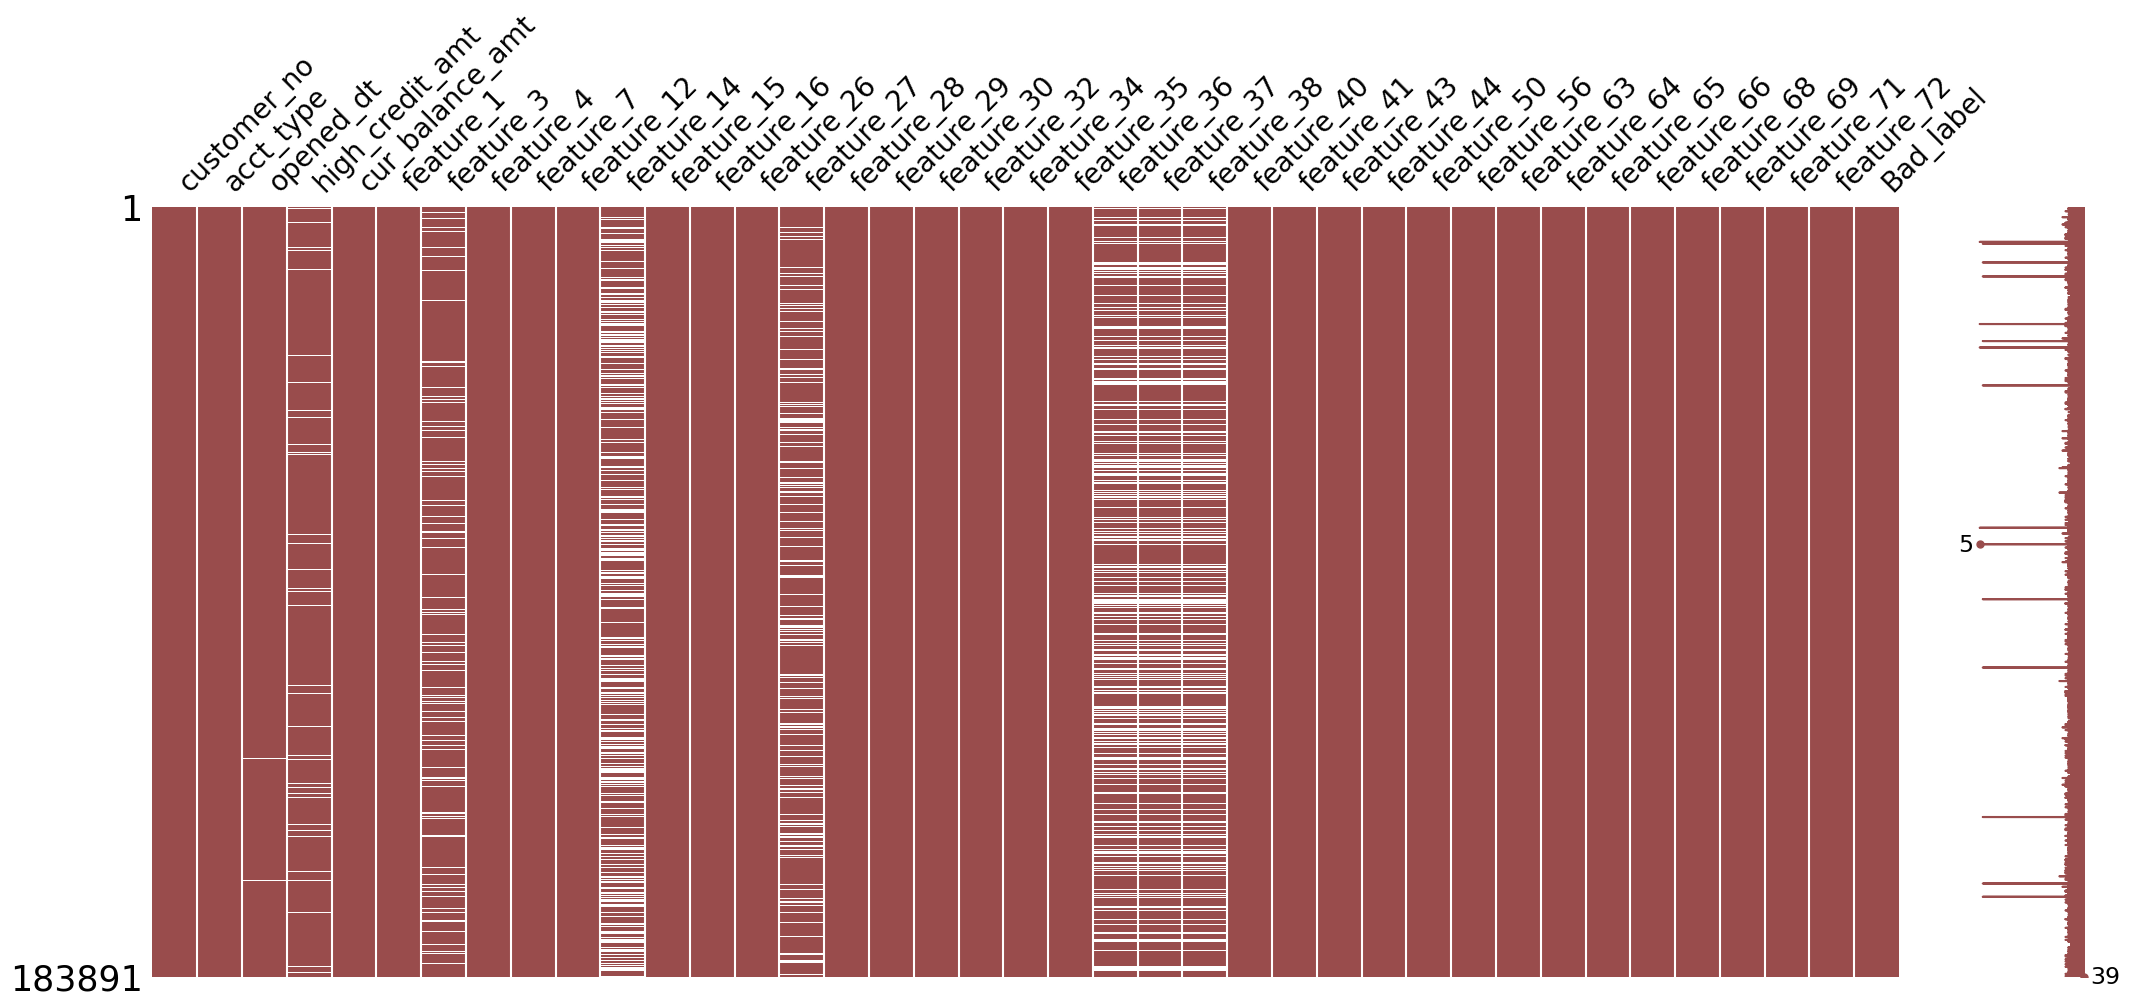

In [33]:
import missingno as msno ## this plot is used to detect the null values
msno.matrix(data,color=(0.60,0.300,0.300),fontsize=20)

In [34]:
for i in data.columns:
    print(f"======= { i } ========\n")
    print(data[i].value_counts())

======= customer_no ========

8814     76
11922    71
8872     68
51       66
8770     64
         ..
1743      1
20507     1
20427     1
21944     1
17698     1
Name: customer_no, Length: 23896, dtype: int64
======= acct_type ========

10    99092
6     25237
5     22629
1      9290
13     8478
2      5577
7      4161
0      3891
12     1188
32      735
51      719
3       665
15      492
17      405
8       404
53      377
4       184
52       97
54       71
35       54
9        50
31       26
59       22
55       17
56        8
34        5
33        5
14        5
11        4
16        2
57        1
Name: acct_type, dtype: int64
======= opened_dt ========

13-Apr-12    503
31-Oct-14    472
31-Jan-15    339
30-Sep-14    331
31-Dec-14    329
            ... 
22-Apr-94      1
02-Apr-01      1
07-Oct-00      1
27-Aug-00      1
02-Jun-00      1
Name: opened_dt, Length: 6245, dtype: int64
======= high_credit_amt ========

100000.0    3925
150000.0    2296
200000.0    2134
300000.0    1598


##### Filling all null value by the help of Measure of Central Tendency


In [35]:
data.loc[data["opened_dt"].isnull(),"opened_dt"] = "13-Apr-12"
data.loc[data["high_credit_amt"].isnull(),"high_credit_amt"] = np.mean(data.high_credit_amt)
data.loc[data["feature_1"].isnull(),"feature_1"] = "Platinum Maxima"
data.loc[data["feature_3"].isnull(),"feature_3"] = 682.0
data.loc[data["feature_4"].isnull(),"feature_4"] = 3.000000
data.loc[data["feature_7"].isnull(),"feature_7"] = np.mean(data.feature_7)
data.loc[data["feature_12"].isnull(),"feature_12"] = "PM1"
data.loc[data["feature_14"].isnull(),"feature_14"] = 12.000000
data.loc[data["feature_15"].isnull(),"feature_15"] = "SA03"
data.loc[data["feature_16"].isnull(),"feature_16"] = "AS03"
data.loc[data["feature_26"].isnull(),"feature_26"] = 0.000000
data.loc[data["feature_27"].isnull(),"feature_27"] = "Graduate"
data.loc[data["feature_28"].isnull(),"feature_28"] = "New Delhi"
data.loc[data["feature_29"].isnull(),"feature_29"] = np.mean(data.feature_29)
data.loc[data["feature_30"].isnull(),"feature_30"] = 2010.0
data.loc[data["feature_32"].isnull(),"feature_32"] = "Self"
data.loc[data["feature_34"].isnull(),"feature_34"] = 2.0
data.loc[data["feature_35"].isnull(),"feature_35"] = 42759.59392727169
data.loc[data["feature_36"].isnull(),"feature_36"] = "Private Ltd. Co."
data.loc[data["feature_37"].isnull(),"feature_37"] = "Banking/Financial Services"
data.loc[data["feature_38"].isnull(),"feature_38"] = "MANAGER"
data.loc[data["feature_40"].isnull(),"feature_40"] = 0.0
data.loc[data["feature_41"].isnull(),"feature_41"] = 11.0
data.loc[data["feature_43"].isnull(),"feature_43"] = "New Delhi"
data.loc[data["feature_44"].isnull(),"feature_44"] = np.mean(data.feature_44)
data.loc[data["feature_50"].isnull(),"feature_50"] = "Y"
data.loc[data["feature_63"].isnull(),"feature_63"] = "2010-0"
data.loc[data["feature_64"].isnull(),"feature_64"] = 10.0
data.loc[data["feature_65"].isnull(),"feature_65"] = 157.0
data.loc[data["feature_66"].isnull(),"feature_66"] = np.mean(data.feature_66)
data.loc[data["feature_68"].isnull(),"feature_68"] = 1.0
data.loc[data["feature_69"].isnull(),"feature_69"] = np.mean(data.feature_69)
data.loc[data["feature_71"].isnull(),"feature_71"] = 10.0
data.loc[data["feature_72"].isnull(),"feature_72"] = "R"
data.loc[data["feature_56"].isnull(),"feature_56"] = 10.0

In [36]:
data.isnull().sum()  # checking null value

customer_no        0
acct_type          0
opened_dt          0
high_credit_amt    0
cur_balance_amt    0
feature_1          0
feature_3          0
feature_4          0
feature_7          0
feature_12         0
feature_14         0
feature_15         0
feature_16         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_32         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_40         0
feature_41         0
feature_43         0
feature_44         0
feature_50         0
feature_56         0
feature_63         0
feature_64         0
feature_65         0
feature_66         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
Bad_label          0
dtype: int64

<AxesSubplot:>

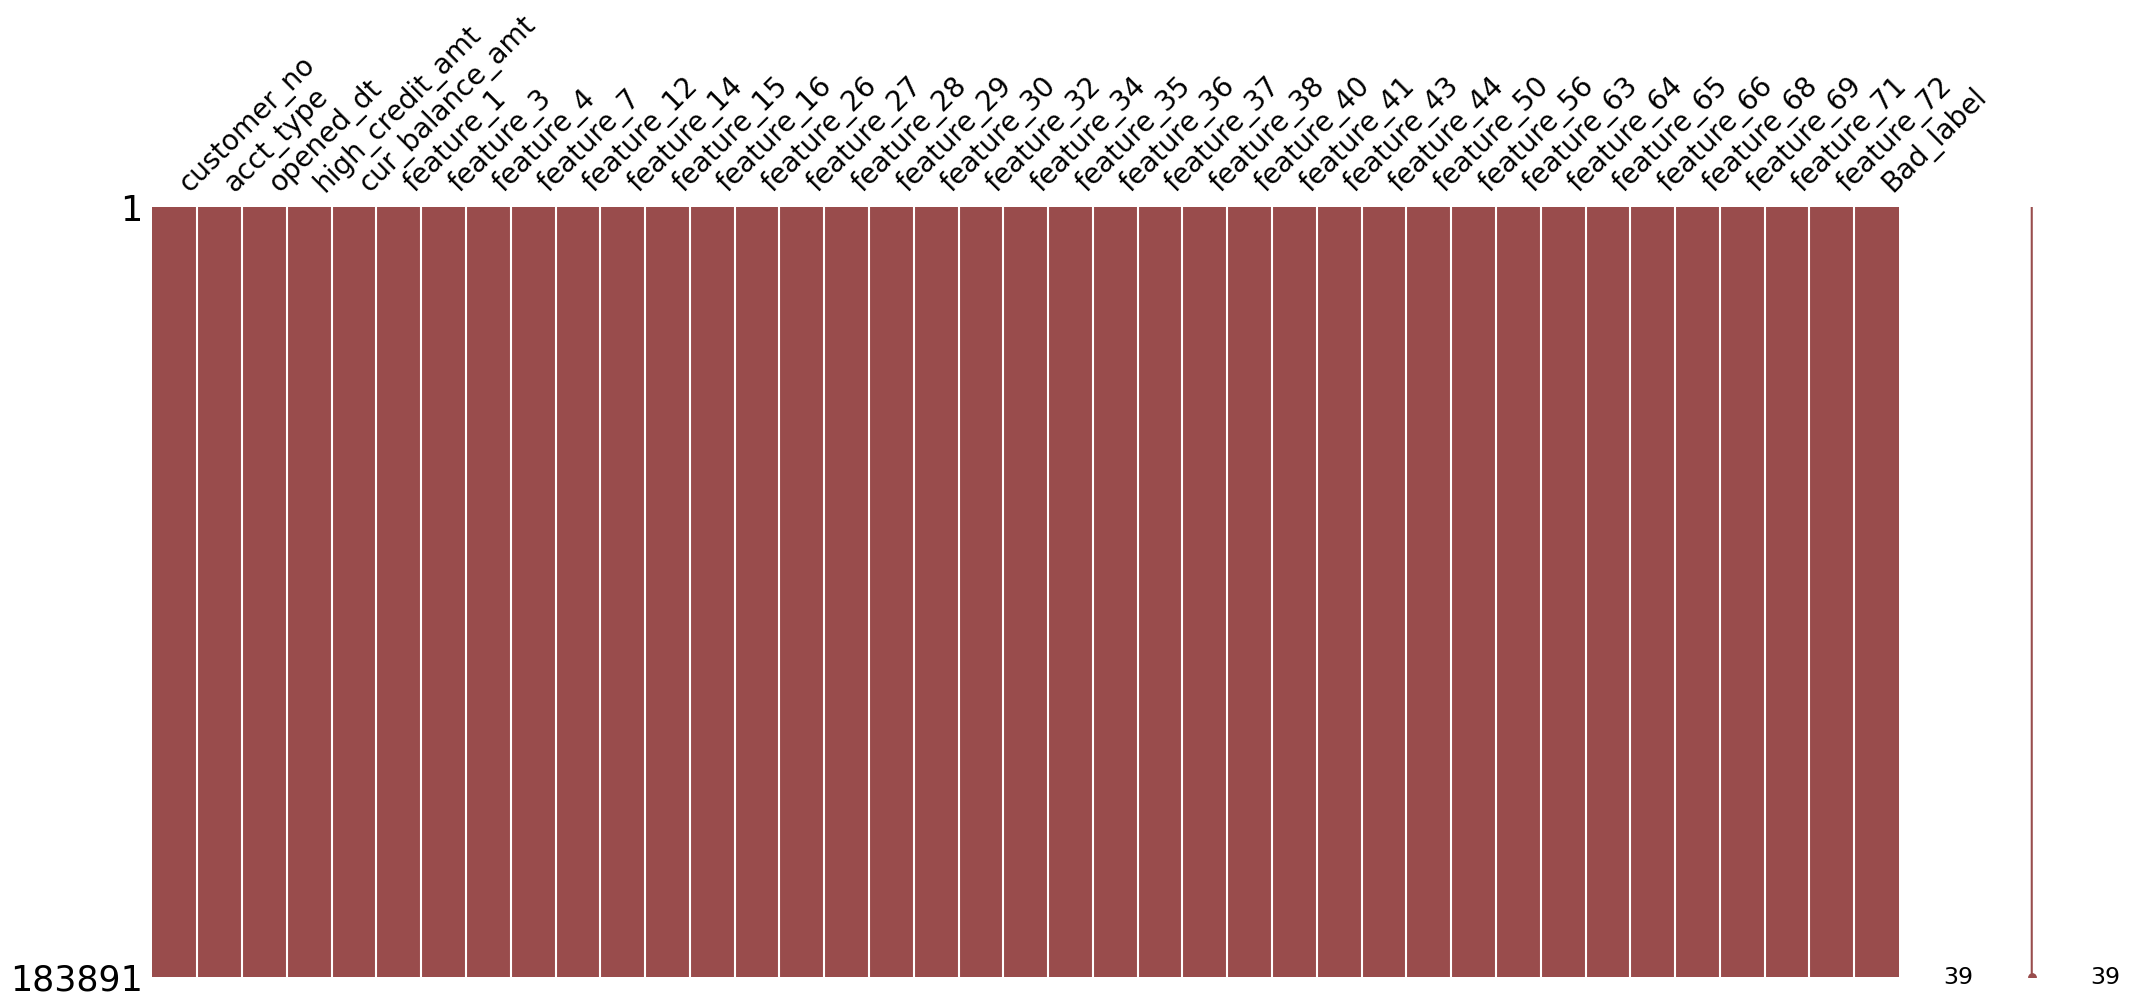

In [37]:
import missingno as msno ## this plot is used to detect the null values
msno.matrix(data,color=(0.60,0.300,0.300),fontsize=20)

In [38]:
# Converting Date columns in date formate using pd.to_datetime technique
def convert_into_datetime(columns):
    data[columns]=pd.to_datetime(data[columns])
    
# Converting the columns into Datetime using for loop
for i in ['opened_dt']:  
    convert_into_datetime(i) 
    
# Create the new columns with month 
data['opened_dt_year']=data['opened_dt'].dt.year

data.drop('opened_dt',axis=1,inplace=True)  # drop opened_dt columns because now it's not necessary
    

In [39]:
# here i'm going to split the feature_63 columns for getting only year

data.feature_63 = data['feature_63'].str.split('-',expand=True)[0]

In [40]:
data

customer_no  acct_type  high_credit_amt  cur_balance_amt  \
0             12265          6          20900.0                0   
1             12265         10          16201.0            10390   
2             12265         10          41028.0            34420   
3             15606         10          93473.0                0   
4             15606          6          20250.0            13500   
...             ...        ...              ...              ...   
186324         1611         10          24228.0            24228   
186325         1611         10          19584.0                0   
186326         1611         10          50844.0                0   
186327         1611         10          35587.0                0   
186328         1611          6          26000.0                0   

              feature_1  feature_3  feature_4  feature_7 feature_12  \
0       Platinum Maxima      683.0        3.0    56000.0        PM1   
1       Platinum Maxima      683.0        3.0    56000.0        PM1   
2       Platinum Maxima      683.0        3.0    56000.0        PM1   
3       Platinum Deligh      687.0        3.0   125000.0        PD1   
4       Platinum Deligh      687.0        3.0   125000.0        PD1   
...                 ...        ...        ...        ...        ...   
186324  Titanium Deligh      746.0        3.0   138000.0        TD1   
186325  Titanium Deligh      746.0        3.0   138000.0        TD1   
186326  Titanium Deligh      746.0        3.0   138000.0        TD1   
186327  Titanium Deligh      746.0        3.0   138000.0        TD1   
186328  Titanium Deligh      746.0        3.0   138000.0        TD1   

        feature_14 feature_15 feature_16  feature_26     feature_27  \
0             12.0       SA05       MA01         0.0        MBA/MMS   
1             12.0       SA05       MA01         0.0        MBA/MMS   
2             12.0       SA05       MA01         0.0        MBA/MMS   
3             12.0       SA35       S001         2.0  Post-Graduate   
4             12.0       SA35       S001         2.0  Post-Graduate   
...            ...        ...        ...         ...            ...   
186324         0.0       BBOL       H004         3.0  Post-Graduate   
186325         0.0       BBOL       H004         3.0  Post-Graduate   
186326         0.0       BBOL       H004         3.0  Post-Graduate   
186327         0.0       BBOL       H004         3.0  Post-Graduate   
186328         0.0       BBOL       H004         3.0  Post-Graduate   

                      feature_28  feature_29  feature_30 feature_32  \
0                      New Delhi    110059.0      2006.0      Paren   
1                      New Delhi    110059.0      2006.0      Paren   
2                      New Delhi    110059.0      2006.0      Paren   
3                      Faridabad    121003.0      2009.0       Self   
4                      Faridabad    121003.0      2009.0       Self   
...                          ...         ...         ...        ...   
186324  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186325  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186326  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186327  Hyderabad / Secunderabad    500017.0      1995.0       Self   
186328  Hyderabad / Secunderabad    500017.0      1995.0       Self   

        feature_34  feature_35        feature_36                  feature_37  \
0              1.0     35000.0  Private Ltd. Co.                      Others   
1              1.0     35000.0  Private Ltd. Co.                      Others   
2              1.0     35000.0  Private Ltd. Co.                      Others   
3              1.0    100000.0  Private Ltd. Co.  Banking/Financial Services   
4              1.0    100000.0  Private Ltd. Co.  Banking/Financial Services   
...            ...         ...               ...                         ...   
186324         1.0     45800.0  Private Ltd. Co.  Banking/Financial Serv

In [41]:
data.loc[data["feature_3"]<500,"feature_3"]=np.median(data.feature_3)

In [42]:
# Change columns type according to their value some columns having object type but it should in int type 

data.high_credit_amt = data.high_credit_amt.astype(int)
data.feature_3 = data.feature_3.astype(int)
data.feature_4 = data.feature_4.astype(int)
data.feature_14 = data.feature_14.astype(int)
data.feature_26 = data.feature_26.astype(int)
data.feature_30 = data.feature_30.astype(int)
data.feature_34 = data.feature_34.astype(int)
data.feature_40 = data.feature_40.astype(int)
data.feature_44 = data.feature_41.astype(int)
data.feature_56 = data.feature_56.astype(int)
data.feature_63 = data.feature_63.astype(int)
data.feature_64 = data.feature_64.astype(int)
data.feature_65 = data.feature_65.astype(int)
data.feature_68 = data.feature_68.astype(int)
data.feature_71 = data.feature_71.astype(int)

In [43]:
data

customer_no  acct_type  high_credit_amt  cur_balance_amt  \
0             12265          6            20900                0   
1             12265         10            16201            10390   
2             12265         10            41028            34420   
3             15606         10            93473                0   
4             15606          6            20250            13500   
...             ...        ...              ...              ...   
186324         1611         10            24228            24228   
186325         1611         10            19584                0   
186326         1611         10            50844                0   
186327         1611         10            35587                0   
186328         1611          6            26000                0   

              feature_1  feature_3  feature_4  feature_7 feature_12  \
0       Platinum Maxima        683          3    56000.0        PM1   
1       Platinum Maxima        683          3    56000.0        PM1   
2       Platinum Maxima        683          3    56000.0        PM1   
3       Platinum Deligh        687          3   125000.0        PD1   
4       Platinum Deligh        687          3   125000.0        PD1   
...                 ...        ...        ...        ...        ...   
186324  Titanium Deligh        746          3   138000.0        TD1   
186325  Titanium Deligh        746          3   138000.0        TD1   
186326  Titanium Deligh        746          3   138000.0        TD1   
186327  Titanium Deligh        746          3   138000.0        TD1   
186328  Titanium Deligh        746          3   138000.0        TD1   

        feature_14 feature_15 feature_16  feature_26     feature_27  \
0               12       SA05       MA01           0        MBA/MMS   
1               12       SA05       MA01           0        MBA/MMS   
2               12       SA05       MA01           0        MBA/MMS   
3               12       SA35       S001           2  Post-Graduate   
4               12       SA35       S001           2  Post-Graduate   
...            ...        ...        ...         ...            ...   
186324           0       BBOL       H004           3  Post-Graduate   
186325           0       BBOL       H004           3  Post-Graduate   
186326           0       BBOL       H004           3  Post-Graduate   
186327           0       BBOL       H004           3  Post-Graduate   
186328           0       BBOL       H004           3  Post-Graduate   

                      feature_28  feature_29  feature_30 feature_32  \
0                      New Delhi    110059.0        2006      Paren   
1                      New Delhi    110059.0        2006      Paren   
2                      New Delhi    110059.0        2006      Paren   
3                      Faridabad    121003.0        2009       Self   
4                      Faridabad    121003.0        2009       Self   
...                          ...         ...         ...        ...   
186324  Hyderabad / Secunderabad    500017.0        1995       Self   
186325  Hyderabad / Secunderabad    500017.0        1995       Self   
186326  Hyderabad / Secunderabad    500017.0        1995       Self   
186327  Hyderabad / Secunderabad    500017.0        1995       Self   
186328  Hyderabad / Secunderabad    500017.0        1995       Self   

        feature_34  feature_35        feature_36                  feature_37  \
0                1     35000.0  Private Ltd. Co.                      Others   
1                1     35000.0  Private Ltd. Co.                      Others   
2                1     35000.0  Private Ltd. Co.                      Others   
3                1    100000.0  Private Ltd. Co.  Banking/Financial Services   
4                1    100000.0  Private Ltd. Co.  Banking/Financial Services   
...            ...         ...               ...                         ...   
186324           1     45800.0  Private Ltd. Co.  Banking/Financial Serv

# EDA

In [44]:
catagorical=data.describe(include="O")

In [45]:
catagorical

feature_1 feature_12 feature_15 feature_16 feature_27  \
count            183891     183891     183891     183891     183891   
unique                7         16        364        522         10   
top     Platinum Maxima        PM1       SA03       AS03   Graduate   
freq              74978      73144      68265       9500     138359   

       feature_28 feature_32        feature_36                  feature_37  \
count      183891     183891            183891                      183891   
unique         62          5                 9                          11   
top     New Delhi       Self  Private Ltd. Co.  Banking/Financial Services   
freq        86596      91398            112743                      148232   

       feature_38 feature_43 feature_50 feature_72  
count      183891     183891     183891     183891  
unique       5663         70          2          2  
top       MANAGER  New Delhi          Y          R  
freq        65085      69479     102546     128537

In [46]:
numaric=data.describe(exclude="O")

In [47]:
numaric

customer_no      acct_type  high_credit_amt  cur_balance_amt  \
count  183891.000000  183891.000000     1.838910e+05     1.838910e+05   
mean    11449.918881       8.402635     1.756721e+05     7.648030e+04   
std      6732.958411       5.171297     9.653449e+05     6.210960e+05   
min         1.000000       0.000000     1.000000e+00    -7.355205e+06   
25%      5879.000000       6.000000     2.400000e+04     0.000000e+00   
50%     11206.000000      10.000000     4.890000e+04     0.000000e+00   
75%     16999.000000      10.000000     1.350650e+05     2.106650e+04   
max     23896.000000      59.000000     1.800000e+08     1.360100e+08   

           feature_3      feature_4     feature_7     feature_14  \
count  183891.000000  183891.000000  1.838910e+05  183891.000000   
mean      720.779271       2.313245  1.343848e+05       9.003246   
std        36.376598       0.904052  9.189254e+04       5.194291   
min       553.000000       1.000000  0.000000e+00       0.000000   
25%       690.000000       1.000000  8.000000e+04      12.000000   
50%       718.000000       3.000000  1.140000e+05      12.000000   
75%       744.000000       3.000000  1.520000e+05      12.000000   
max       896.000000       3.000000  1.217000e+06      12.000000   

          feature_26     feature_29     feature_30     feature_34  \
count  183891.000000  183891.000000  183891.000000  183891.000000   
mean        0.849846  242650.031583    2000.314561       1.282314   
std         1.170648  170865.846474      12.661383       0.453880   
min         0.000000  110001.000000    1964.000000       1.000000   
25%         0.000000  110057.000000    1990.000000       1.000000   
50%         0.000000  121004.000000    2005.000000       1.000000   
75%         2.000000  400086.000000    2011.000000       2.000000   
max        10.000000  712245.000000    2015.000000       3.000000   

         feature_35     feature_40     feature_41     feature_44  \
count  1.838910e+05  183891.000000  183891.000000  183891.000000   
mean   3.856472e+04       3.108118       5.969520       5.969520   
std    1.032339e+05       3.560594       4.482257       4.482257   
min    1.000000e+00       0.000000       0.000000       0.000000   
25%    1.000000e+00       0.000000       0.000000       0.000000   
50%    3.500000e+04       1.000000       7.000000       7.000000   
75%    5.000000e+04       6.000000      11.000000      11.000000   
max    1.500000e+07      12.000000      11.000000      11.000000   

          feature_56     feature_63     feature_64     feature_65  \
count  183891.000000  183891.000000  183891.000000  183891.000000   
mean       13.385272    2000.314561      14.256989     142.305105   
std         8.506147      12.661383       9.362371     179.111123   
min         2.000000    1964.000000       2.000000       1.000000   
25%        10.000000    1990.000000      10.000000      15.000000   
50%        10.000000    2005.000000      10.000000     157.000000   
75%        17.000000    2011.000000      21.000000     157.000000   
max        35.000000    2015.000000      35.000000   10008.000000   

          feature_66     feature_68    feature_69     feature_71  \
count  183891.000000  183891.000000  1.838910e+05  183891.000000   
mean   274956.646302       1.281640  3.856189e+04      14.295066   
std    196243.858050       0.453556  1.032338e+05       9.087651   
min    110001.000000       1.000000  1.000000e+00       2.000000   
25%    110059.000000       1.000000  1.000000e+00      10.000000   
50%    201001.000000       1.000000  3.500000e+04      10.000000   
75%    411017.000000       2.000000  5.000000e+04      21.000000   
max    874401.000000       3.000000  1.500000e+07      35.000000   

           Bad_label  opened_dt_year  
count  183891.000000   183891.000000  
mean        0.035238     2010.980347  
std         0.184382        3.676549  
min         0.000000     1979.000000  
25%         0.000000     2008.000000  
50%         0.000000     2012.0000

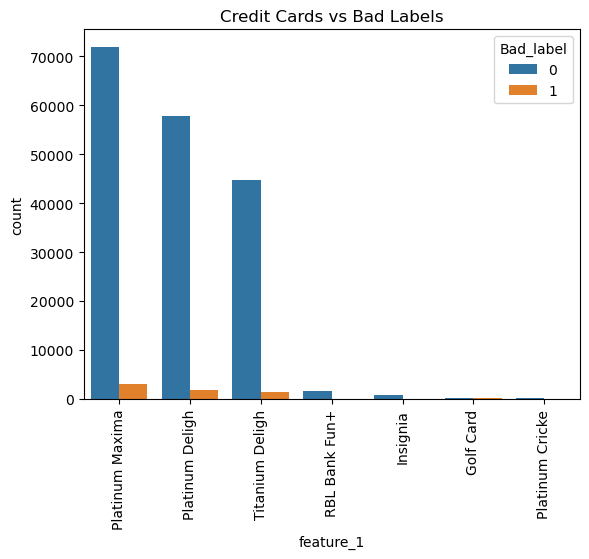

In [48]:
sns.countplot(data.feature_1,hue = data.Bad_label)  #assign countplot between feature_1 and Bad Labels
plt.title("Credit Cards vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show() # for showing graphs

#### Insights

* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score

<AxesSubplot:xlabel='feature_3', ylabel='Count'>

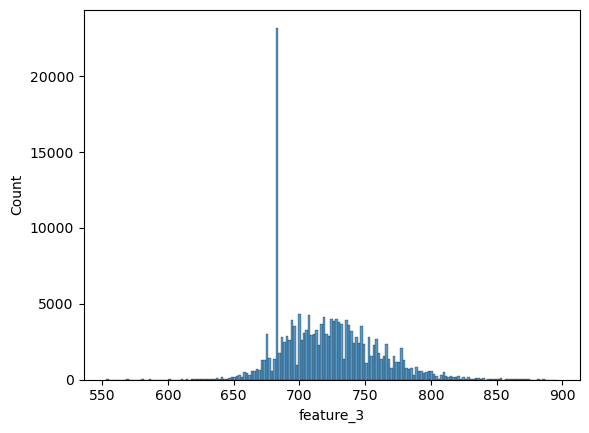

In [49]:
sns.histplot(data.feature_3)# asign histplot for feature_3

### Insights

* Most of the customers have good credit score

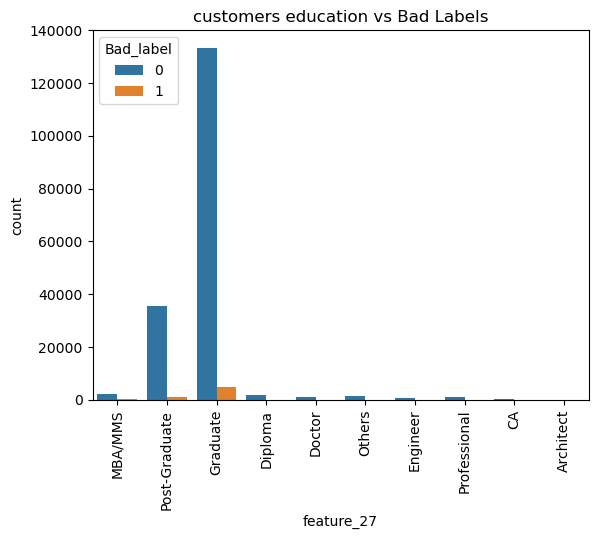

In [50]:
sns.countplot(data.feature_27,hue = data.Bad_label)#assign countplot between feature_27 and Bad Labels
plt.title("customers education vs Bad Labels")# assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights

* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.

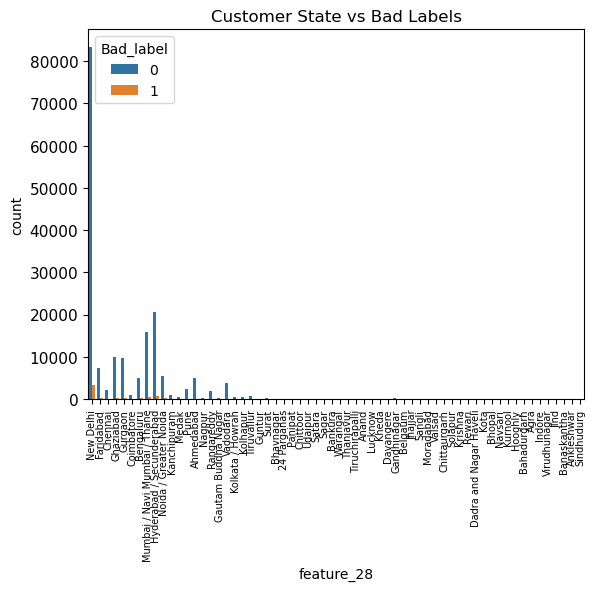

In [51]:
sns.countplot(data.feature_28,hue = data.Bad_label)#assign countplot between feature_28 and Bad Labels
plt.title("Customer State vs Bad Labels") # assign title name of distributions
plt.xticks(fontsize = 7,rotation = 90)#increasing font of x-axis and rorating 90 degree 
plt.yticks(fontsize = 11)#increasing font of y-axis
plt.show()# for showing graphs

### Insights

* Most of the Customers belong from New Delhi.

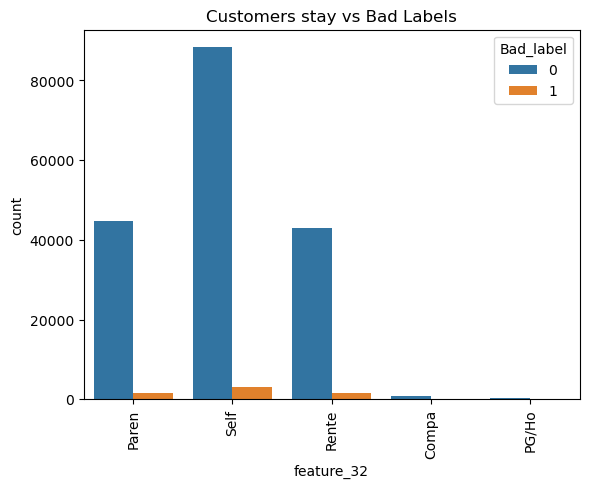

In [52]:
sns.countplot(data.feature_32,hue = data.Bad_label)#assign countplot between feature_32 and Bad Labels
plt.title("Customers stay vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights

* Most of the customers who has crdit cards they stay at their own house.

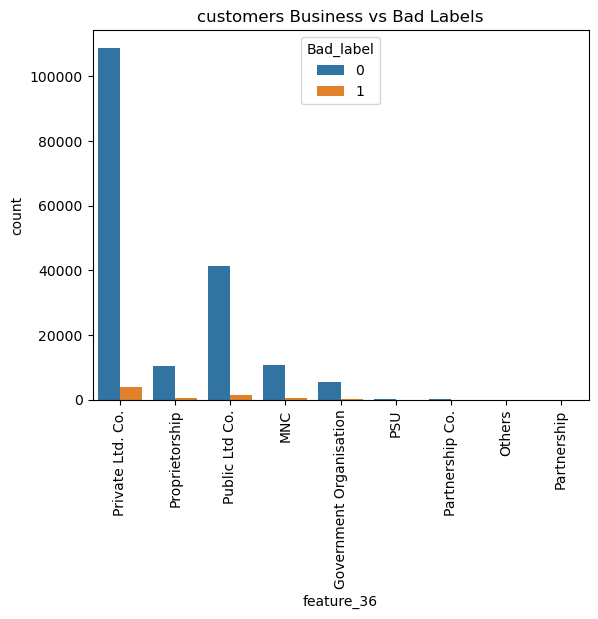

In [53]:
sns.countplot(data.feature_36,hue = data.Bad_label) #assign countplot between feature_36 and Bad Labels
plt.title("customers Business vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights 


* Most of the Customer having Credit Cards who belong from Private Ltd.Co.
* Customers who started their bussiness in Partership they maintain their credit score.

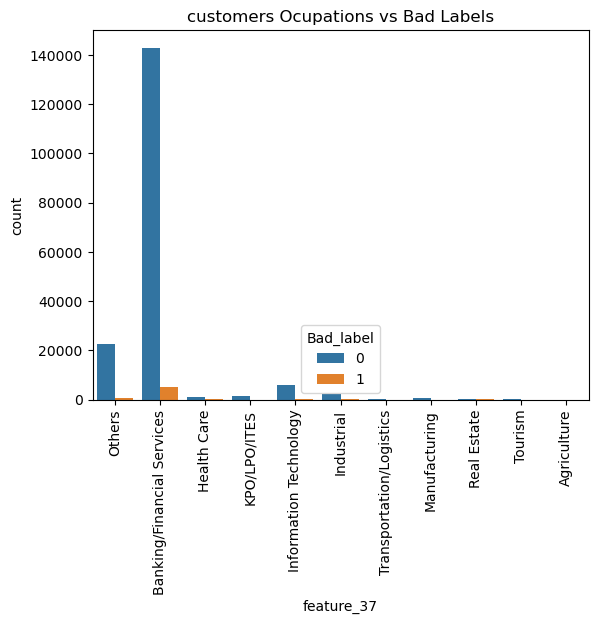

In [54]:
sns.countplot(data.feature_37,hue = data.Bad_label) #assign countplot between feature_37 and Bad Labels
plt.title("customers Ocupations vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights 

* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards. 

# Final Conclusions of Insights :-


* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* Person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* Person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score.
* Most of the customers have good credit score.
* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.
* Most of the Customers belong from New Delhi.
* Most of the Customer having Credit Cards who belong from Private Ltd.Co.
* Customers who started their bussiness in Partership they maintain their credit score.
* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards.
* Most of the customers who has crdit cards they stay at their on home.

In [55]:
data

customer_no  acct_type  high_credit_amt  cur_balance_amt  \
0             12265          6            20900                0   
1             12265         10            16201            10390   
2             12265         10            41028            34420   
3             15606         10            93473                0   
4             15606          6            20250            13500   
...             ...        ...              ...              ...   
186324         1611         10            24228            24228   
186325         1611         10            19584                0   
186326         1611         10            50844                0   
186327         1611         10            35587                0   
186328         1611          6            26000                0   

              feature_1  feature_3  feature_4  feature_7 feature_12  \
0       Platinum Maxima        683          3    56000.0        PM1   
1       Platinum Maxima        683          3    56000.0        PM1   
2       Platinum Maxima        683          3    56000.0        PM1   
3       Platinum Deligh        687          3   125000.0        PD1   
4       Platinum Deligh        687          3   125000.0        PD1   
...                 ...        ...        ...        ...        ...   
186324  Titanium Deligh        746          3   138000.0        TD1   
186325  Titanium Deligh        746          3   138000.0        TD1   
186326  Titanium Deligh        746          3   138000.0        TD1   
186327  Titanium Deligh        746          3   138000.0        TD1   
186328  Titanium Deligh        746          3   138000.0        TD1   

        feature_14 feature_15 feature_16  feature_26     feature_27  \
0               12       SA05       MA01           0        MBA/MMS   
1               12       SA05       MA01           0        MBA/MMS   
2               12       SA05       MA01           0        MBA/MMS   
3               12       SA35       S001           2  Post-Graduate   
4               12       SA35       S001           2  Post-Graduate   
...            ...        ...        ...         ...            ...   
186324           0       BBOL       H004           3  Post-Graduate   
186325           0       BBOL       H004           3  Post-Graduate   
186326           0       BBOL       H004           3  Post-Graduate   
186327           0       BBOL       H004           3  Post-Graduate   
186328           0       BBOL       H004           3  Post-Graduate   

                      feature_28  feature_29  feature_30 feature_32  \
0                      New Delhi    110059.0        2006      Paren   
1                      New Delhi    110059.0        2006      Paren   
2                      New Delhi    110059.0        2006      Paren   
3                      Faridabad    121003.0        2009       Self   
4                      Faridabad    121003.0        2009       Self   
...                          ...         ...         ...        ...   
186324  Hyderabad / Secunderabad    500017.0        1995       Self   
186325  Hyderabad / Secunderabad    500017.0        1995       Self   
186326  Hyderabad / Secunderabad    500017.0        1995       Self   
186327  Hyderabad / Secunderabad    500017.0        1995       Self   
186328  Hyderabad / Secunderabad    500017.0        1995       Self   

        feature_34  feature_35        feature_36                  feature_37  \
0                1     35000.0  Private Ltd. Co.                      Others   
1                1     35000.0  Private Ltd. Co.                      Others   
2                1     35000.0  Private Ltd. Co.                      Others   
3                1    100000.0  Private Ltd. Co.  Banking/Financial Services   
4                1    100000.0  Private Ltd. Co.  Banking/Financial Services   
...            ...         ...               ...                         ...   
186324           1     45800.0  Private Ltd. Co.  Banking/Financial Serv

#### Checking Outliers

In [56]:
# getting that columns which type are integers
data1= data.select_dtypes(include='int')

In [57]:
data1

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_3  \
0             12265          6            20900                0        683   
1             12265         10            16201            10390        683   
2             12265         10            41028            34420        683   
3             15606         10            93473                0        687   
4             15606          6            20250            13500        687   
...             ...        ...              ...              ...        ...   
186324         1611         10            24228            24228        746   
186325         1611         10            19584                0        746   
186326         1611         10            50844                0        746   
186327         1611         10            35587                0        746   
186328         1611          6            26000                0        746   

        feature_4  feature_14  feature_26  feature_30  feature_34  feature_40  \
0               3          12           0        2006           1           1   
1               3          12           0        2006           1           1   
2               3          12           0        2006           1           1   
3               3          12           2        2009           1           1   
4               3          12           2        2009           1           1   
...           ...         ...         ...         ...         ...         ...   
186324          3           0           3        1995           1           0   
186325          3           0           3        1995           1           0   
186326          3           0           3        1995           1           0   
186327          3           0           3        1995           1           0   
186328          3           0           3        1995           1           0   

        feature_44  feature_56  feature_63  feature_64  feature_65  \
0                4          10        2006          10         157   
1                4          10        2006          10         157   
2                4          10        2006          10         157   
3                2          13        2009          13          39   
4                2          13        2009          13          39   
...            ...         ...         ...         ...         ...   
186324          11           2        1995           2          14   
186325          11           2        1995           2          14   
186326          11           2        1995           2          14   
186327          11           2        1995           2          14   
186328          11           2        1995           2          14   

        feature_68  feature_71  Bad_label  opened_dt_year  
0                1          13          1            2013  
1                1          13          1            2012  
2                1          13          1            2012  
3                1          13          1            2006  
4                1          13          1            2015  
...            ...         ...        ...             ...  
186324           1           2          0            2007  
186325           1           2          0            2007  
186326           1           2          0            2006  
186327           1           2          0            2006  
186328           1           2          0            2005  

[183891 rows x 20 columns]

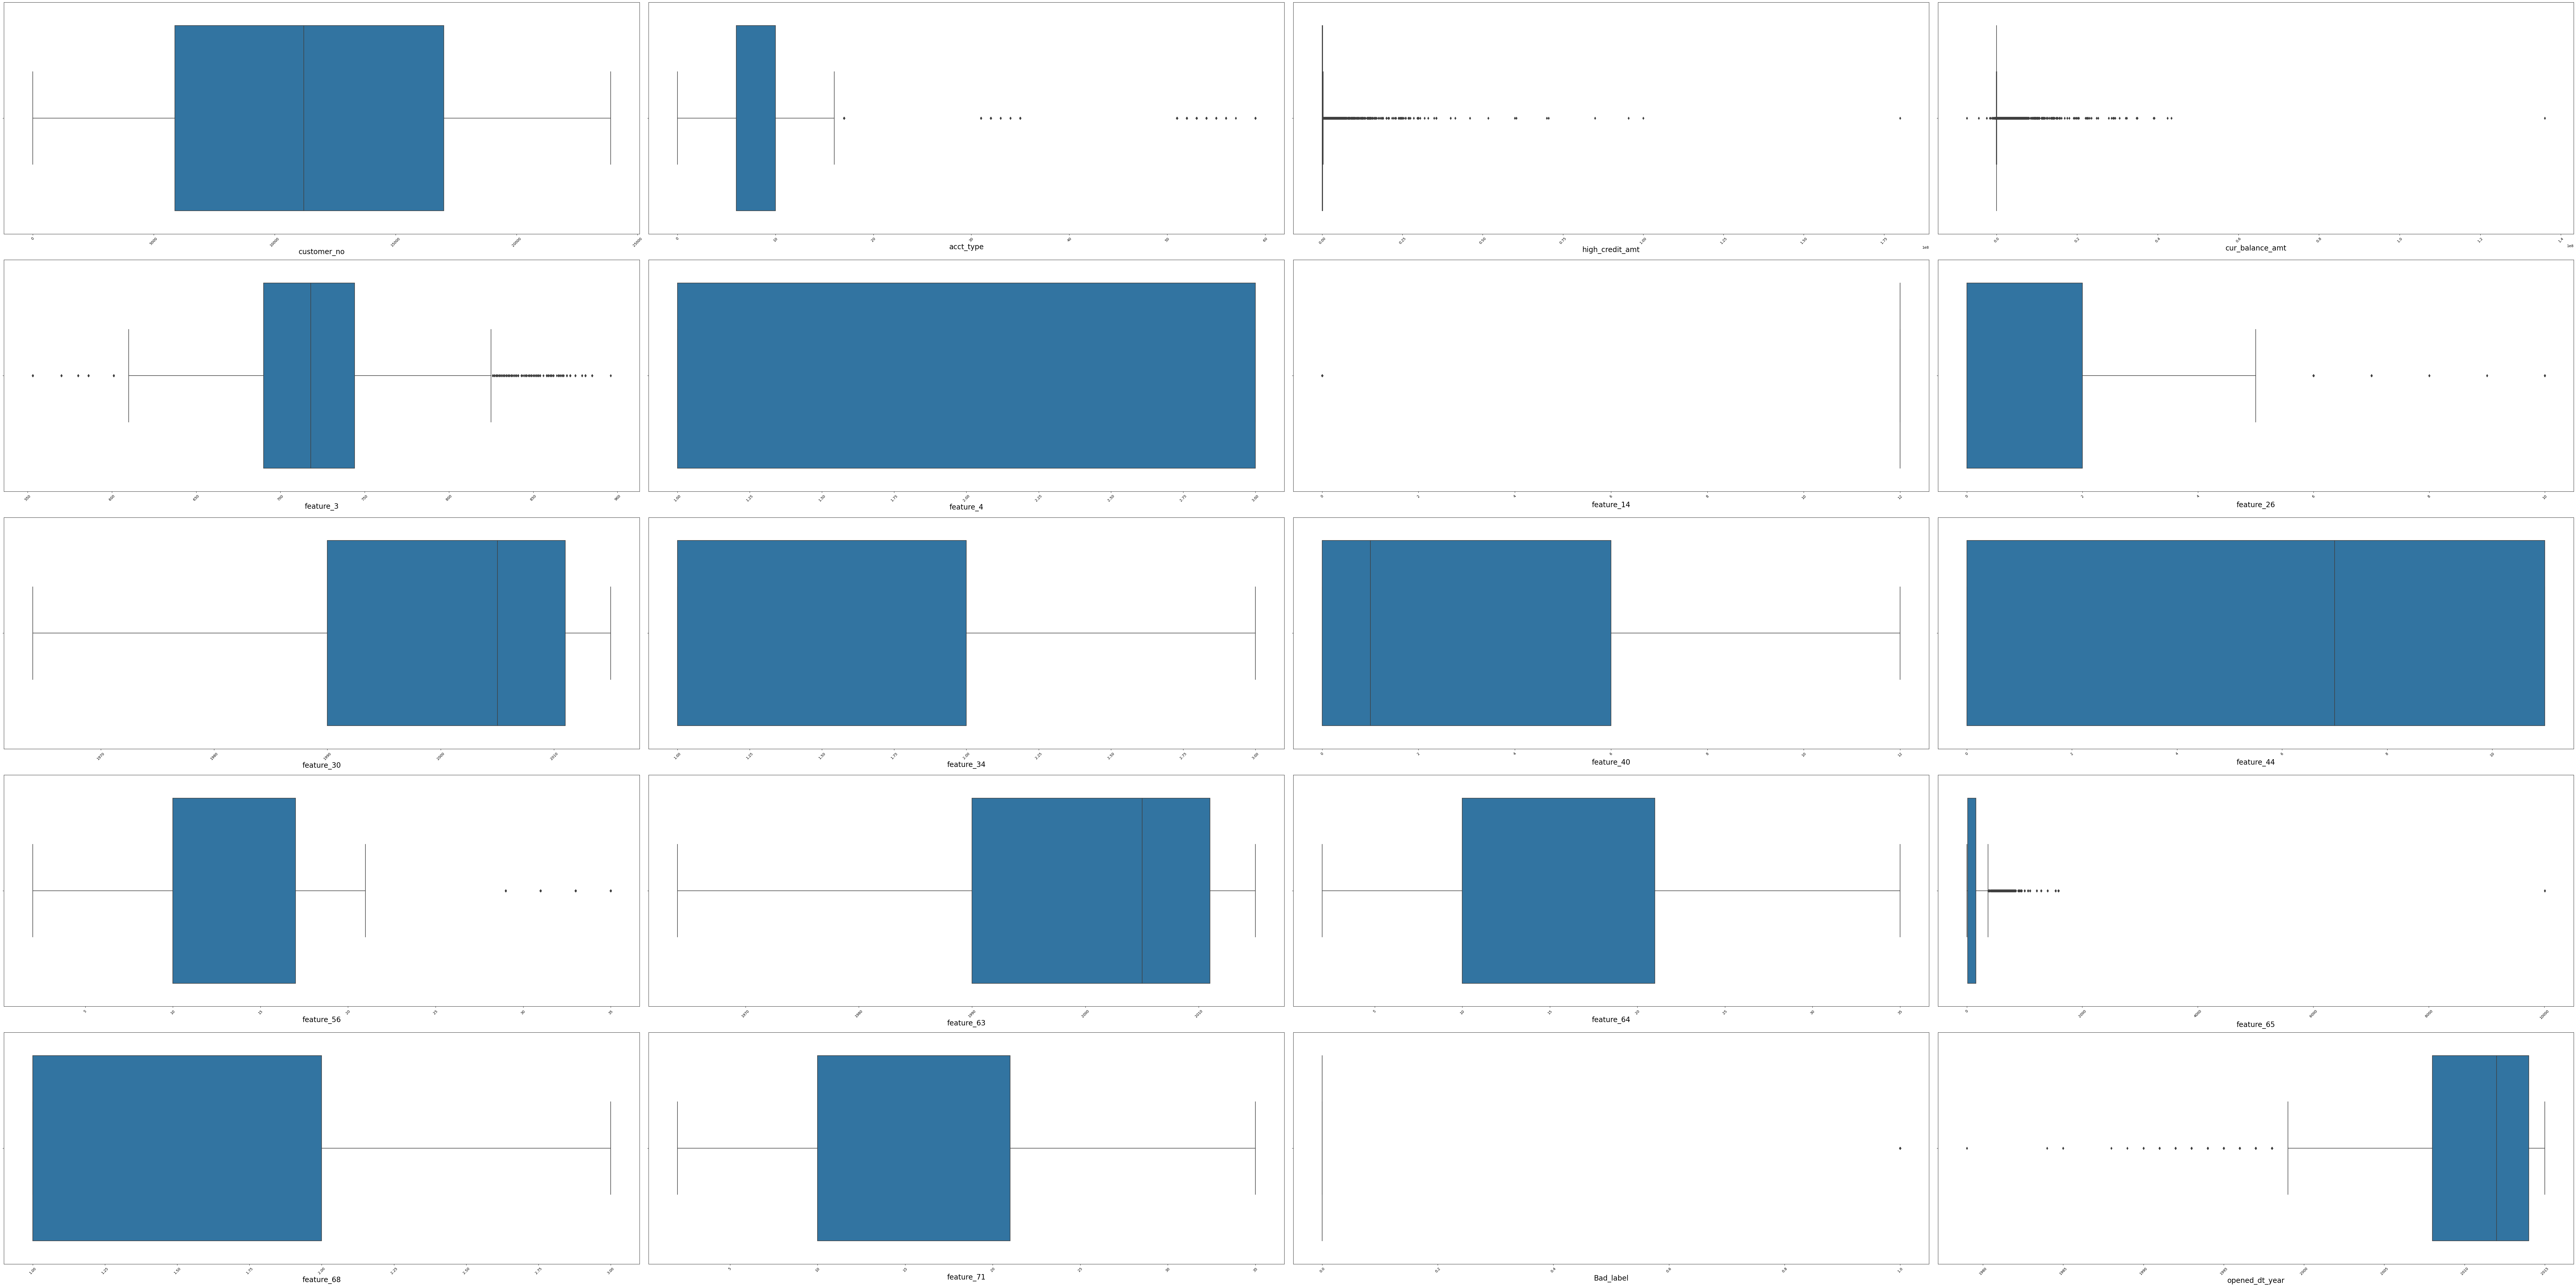

In [58]:
plt.figure(figsize=(100,50))
plotnumber=1
for i in data1:
    plt.subplot(5,4,plotnumber)
    sns.boxplot(x=data[i])
    plotnumber=plotnumber+1
    plt.xticks(rotation=45)
    plt.xlabel(i,fontsize=20)
plt.tight_layout()

In [59]:
data1.columns

Index(['customer_no', 'acct_type', 'high_credit_amt', 'cur_balance_amt',
       'feature_3', 'feature_4', 'feature_14', 'feature_26', 'feature_30',
       'feature_34', 'feature_40', 'feature_44', 'feature_56', 'feature_63',
       'feature_64', 'feature_65', 'feature_68', 'feature_71', 'Bad_label',
       'opened_dt_year'],
      dtype='object')

## Insights
*  By using boxplot we find out the outliers Columns
*  Columns are 
               1)acct_type
               2)high_credit_amt
               3)cur_balance_amt
               4)feature_65
* The outliers are filling the median values 


In [60]:
def find_boundaries(data,variables):
    Q1=data[variables].quantile(0.25)
    Q3=data[variables].quantile(0.75)
    IQR=Q3-Q1
    lowerboundary=Q1-1.5*IQR
    upperboundary=Q3+1.5*IQR
    return lowerboundary,upperboundary

In [61]:
lower_acct_type,upper_acct_type=find_boundaries(data,'acct_type')
print('upper bondary for acct_type',upper_acct_type)
print('lower boundary for acct_type',lower_acct_type)

upper bondary for acct_type 16.0
lower boundary for acct_type 0.0


In [62]:
data.loc[data['acct_type']>16.0,'acct_type']=np.median(data.acct_type)

In [63]:
lower_high_credit_amt,upper_high_credit_amt=find_boundaries(data,'high_credit_amt')
print('upper bondary for high_credit_amt',upper_high_credit_amt)
print('lower boundary for high_credit_amt',lower_high_credit_amt)

upper bondary for high_credit_amt 301662.5
lower boundary for high_credit_amt -142597.5


In [64]:
data.loc[data['high_credit_amt']>301662.5,'high_credit_amt']=np.median(data.high_credit_amt)
data.loc[data['high_credit_amt']<-142597.5,'high_credit_amt']=np.median(data.high_credit_amt)

In [65]:
lower_cur_balance_amt,upper_cur_balance_amt=find_boundaries(data,'cur_balance_amt')
print('upper bondary for cur_balance_amt',upper_cur_balance_amt)
print('lower boundary for cur_balance_amt',lower_cur_balance_amt)

upper bondary for cur_balance_amt 52666.25
lower boundary for cur_balance_amt -31599.75


In [66]:
data.loc[data['cur_balance_amt']>52666.25,'cur_balance_amt']=np.median(data.cur_balance_amt)
data.loc[data['cur_balance_amt']<-31599.75,'cur_balance_amt']=np.median(data.cur_balance_amt)

In [67]:
lower_feature_3,upper_feature_3=find_boundaries(data,'feature_3')
print('upper bondary for feature_3',upper_feature_3)
print('lower boundary for feature_3',lower_feature_3)

upper bondary for feature_3 825.0
lower boundary for feature_3 609.0


In [68]:
data.loc[data['feature_3']>825.0,'feature_3']=np.median(data.feature_3)
data.loc[data['feature_3']<609.0,'feature_3']=np.median(data.feature_3)

In [69]:
lower_feature_65,upper_feature_65=find_boundaries(data,'feature_65')
print('upper bondary for feature_65',upper_feature_65)
print('lower boundary for feature_65',lower_feature_65)

upper bondary for feature_65 370.0
lower boundary for feature_65 -198.0


In [70]:
data.loc[data['feature_65']>370.0,'feature_65']=np.median(data.feature_65)
data.loc[data['feature_65']<-198.0,'feature_65']=np.median(data.feature_65)

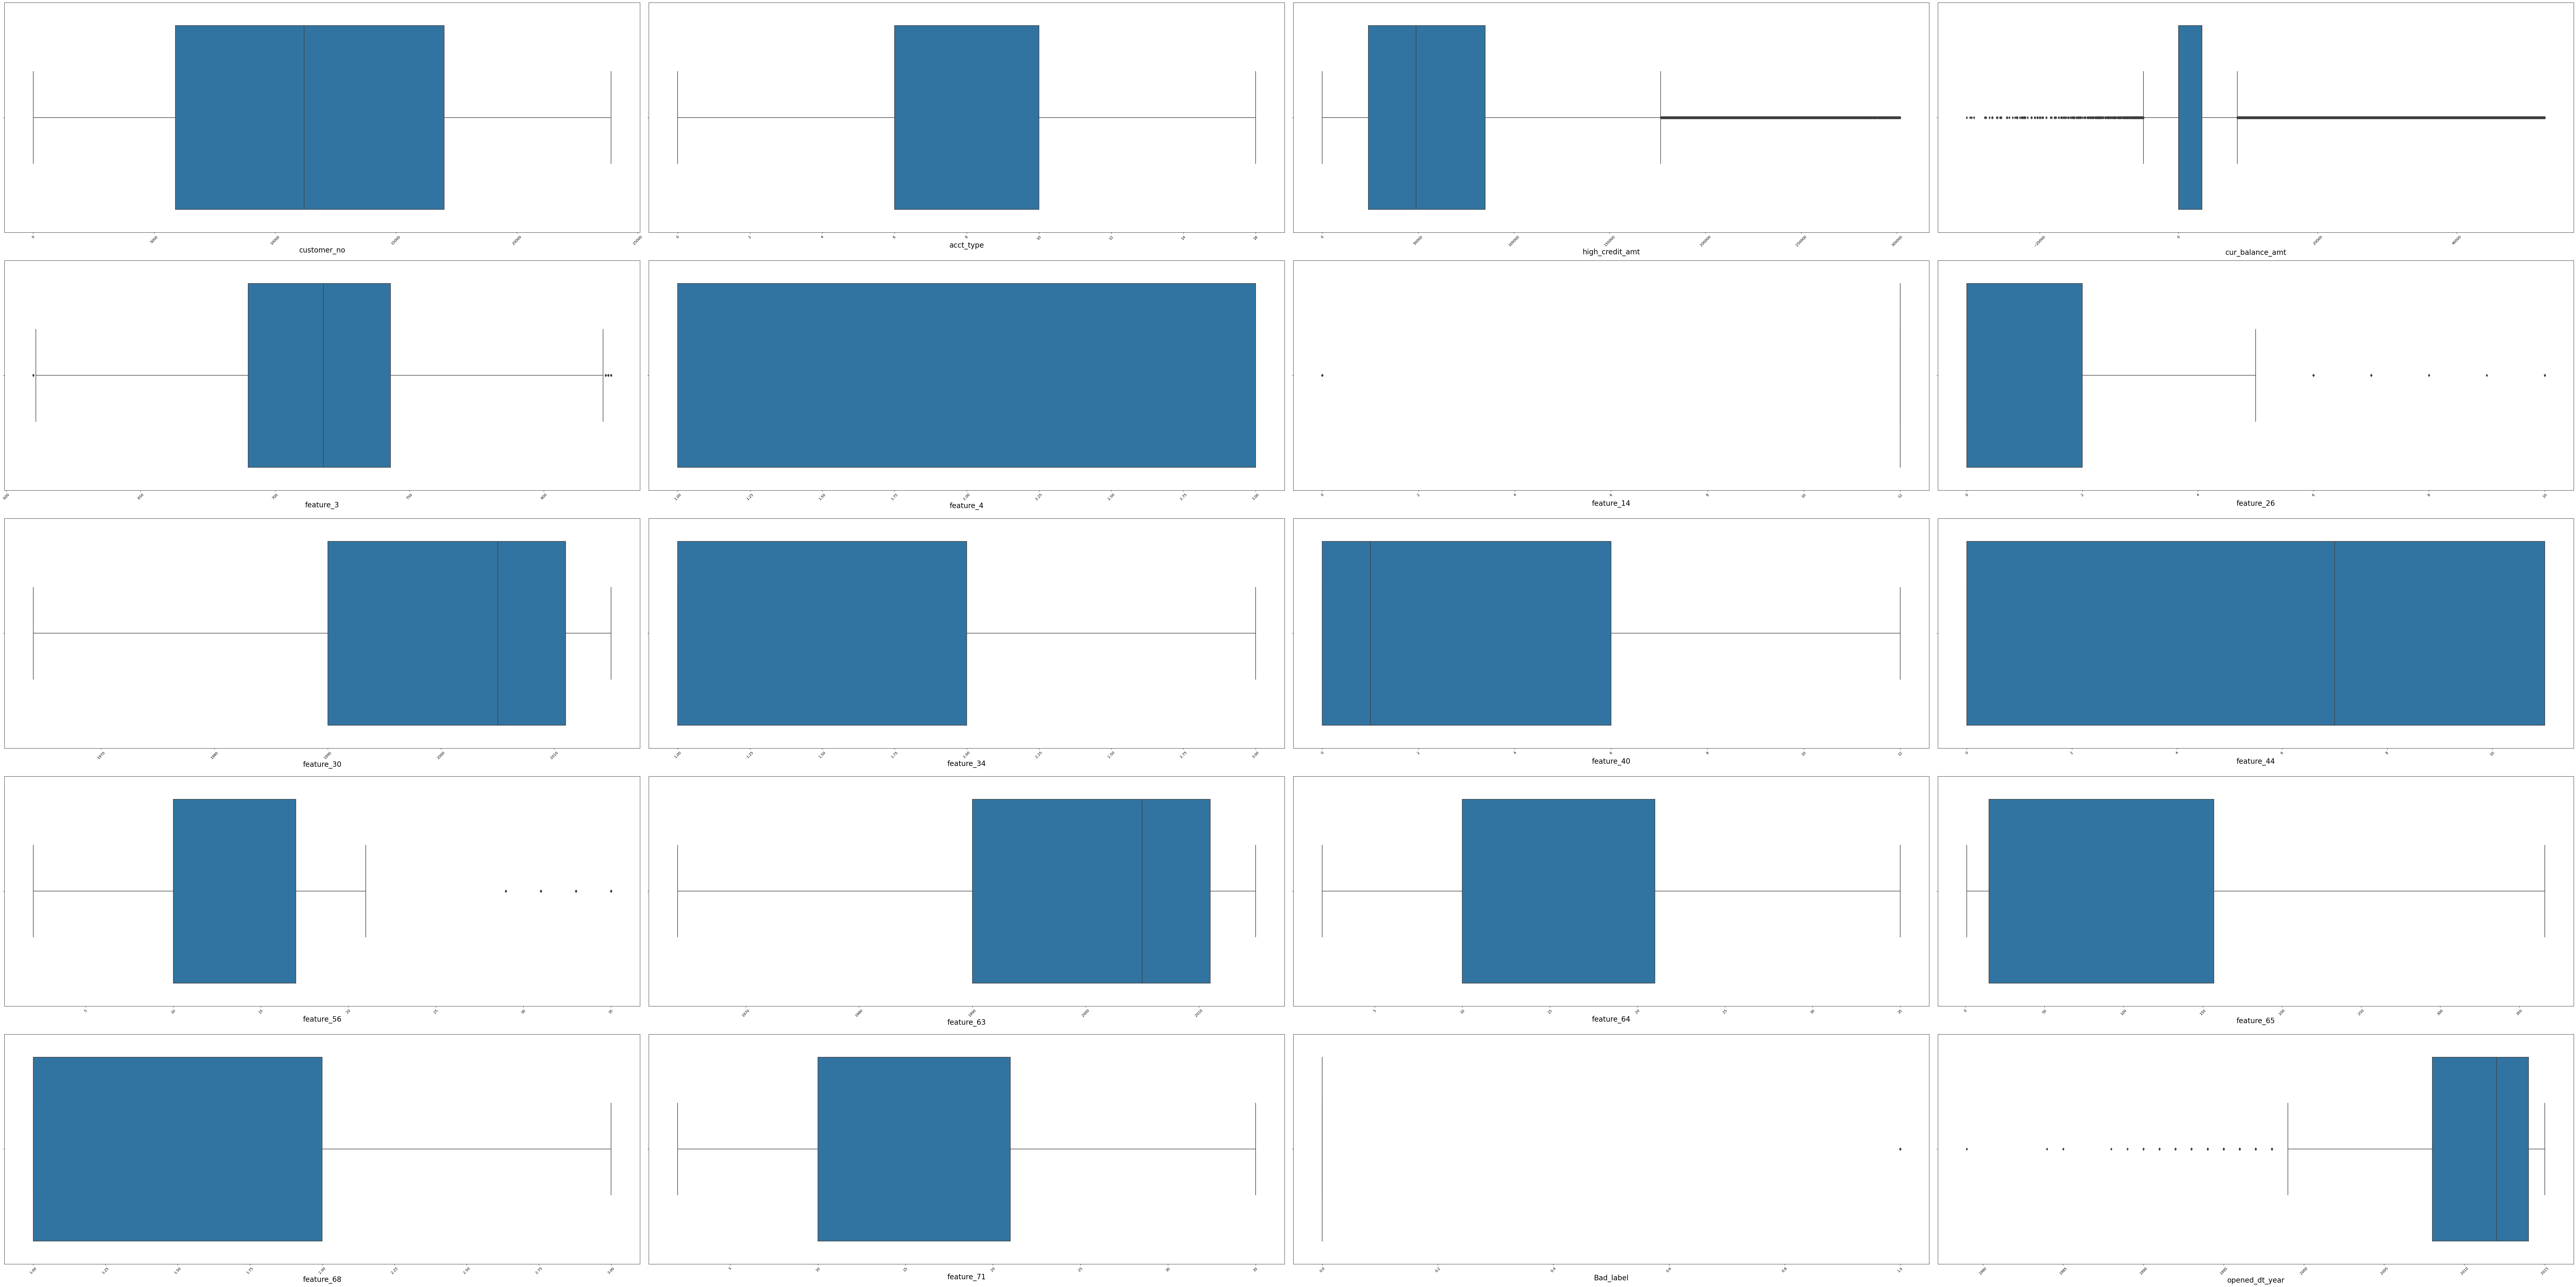

In [71]:
plt.figure(figsize=(100,50))
plotnumber=1
for i in data1:
    plt.subplot(5,4,plotnumber)
    sns.boxplot(x=data[i])
    plotnumber=plotnumber+1
    plt.xticks(rotation=45)
    plt.xlabel(i,fontsize=20)
plt.tight_layout()

##  Insights 
* Finally we remove the outliers
* Remaning data point are not outliers ,They are near the maximum values,minimum value

# Conversion of categorical variables

In [72]:
data.head()

customer_no  acct_type  high_credit_amt  cur_balance_amt        feature_1  \
0        12265          6            20900                0  Platinum Maxima   
1        12265         10            16201            10390  Platinum Maxima   
2        12265         10            41028            34420  Platinum Maxima   
3        15606         10            93473                0  Platinum Deligh   
4        15606          6            20250            13500  Platinum Deligh   

   feature_3  feature_4  feature_7 feature_12  feature_14 feature_15  \
0        683          3    56000.0        PM1          12       SA05   
1        683          3    56000.0        PM1          12       SA05   
2        683          3    56000.0        PM1          12       SA05   
3        687          3   125000.0        PD1          12       SA35   
4        687          3   125000.0        PD1          12       SA35   

  feature_16  feature_26     feature_27 feature_28  feature_29  feature_30  \
0       MA01           0        MBA/MMS  New Delhi    110059.0        2006   
1       MA01           0        MBA/MMS  New Delhi    110059.0        2006   
2       MA01           0        MBA/MMS  New Delhi    110059.0        2006   
3       S001           2  Post-Graduate  Faridabad    121003.0        2009   
4       S001           2  Post-Graduate  Faridabad    121003.0        2009   

  feature_32  feature_34  feature_35        feature_36  \
0      Paren           1     35000.0  Private Ltd. Co.   
1      Paren           1     35000.0  Private Ltd. Co.   
2      Paren           1     35000.0  Private Ltd. Co.   
3       Self           1    100000.0  Private Ltd. Co.   
4       Self           1    100000.0  Private Ltd. Co.   

                   feature_37                 feature_38  feature_40  \
0                      Others                     SR EXE           1   
1                      Others                     SR EXE           1   
2                      Others                     SR EXE           1   
3  Banking/Financial Services  GENRAL MANAGER OPERATIONS           1   
4  Banking/Financial Services  GENRAL MANAGER OPERATIONS           1   

   feature_41 feature_43  feature_44 feature_50  feature_56  feature_63  \
0         4.0    Gurgaon           4          N          10        2006   
1         4.0    Gurgaon           4          N          10        2006   
2         4.0    Gurgaon           4          N          10        2006   
3         2.0  Faridabad           2          N          13        2009   
4         2.0  Faridabad           2          N          13        2009   

   feature_64  feature_65  feature_66  feature_68  feature_69  feature_71  \
0          10         157    110059.0           1     35000.0          13   
1          10         157    110059.0           1     35000.0          13   
2          10         157    110059.0           1     35000.0          13   
3          13          39    121003.0           1    100000.0          13   
4          13          39    121003.0           1    100000.0          13   

  feature_72  Bad_label  opened_dt_year  
0          R          1            2013  
1          R          1            2012  
2          R          1            2012  
3          R          1            2006  
4          R          1            2015

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [74]:
def encoding(data):
    le=LabelEncoder()
    for i in data.select_dtypes('object'):
        data[i]=le.fit_transform(data[i])
    return data 

In [75]:
data=encoding(data)
data.head()

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_1  \
0        12265          6            20900                0          4   
1        12265         10            16201            10390          4   
2        12265         10            41028            34420          4   
3        15606         10            93473                0          3   
4        15606          6            20250            13500          3   

   feature_3  feature_4  feature_7  feature_12  feature_14  feature_15  \
0        683          3    56000.0          10          12         303   
1        683          3    56000.0          10          12         303   
2        683          3    56000.0          10          12         303   
3        687          3   125000.0           7          12         322   
4        687          3   125000.0           7          12         322   

   feature_16  feature_26  feature_27  feature_28  feature_29  feature_30  \
0         360           0           6          42    110059.0        2006   
1         360           0           6          42    110059.0        2006   
2         360           0           6          42    110059.0        2006   
3         427           2           8          18    121003.0        2009   
4         427           2           8          18    121003.0        2009   

   feature_32  feature_34  feature_35  feature_36  feature_37  feature_38  \
0           2           1     35000.0           6           7        4509   
1           2           1     35000.0           6           7        4509   
2           2           1     35000.0           6           7        4509   
3           4           1    100000.0           6           1        2019   
4           4           1    100000.0           6           1        2019   

   feature_40  feature_41  feature_43  feature_44  feature_50  feature_56  \
0           1         4.0          28           4           0          10   
1           1         4.0          28           4           0          10   
2           1         4.0          28           4           0          10   
3           1         2.0          21           2           0          13   
4           1         2.0          21           2           0          13   

   feature_63  feature_64  feature_65  feature_66  feature_68  feature_69  \
0        2006          10         157    110059.0           1     35000.0   
1        2006          10         157    110059.0           1     35000.0   
2        2006          10         157    110059.0           1     35000.0   
3        2009          13          39    121003.0           1    100000.0   
4        2009          13          39    121003.0           1    100000.0   

   feature_71  feature_72  Bad_label  opened_dt_year  
0          13           1          1            2013  
1          13           1          1            2012  
2          13           1          1            2012  
3          13           1          1            2006  
4          13           1          1            2015

## Insights 
* The LabelEncoder class in scikit-learn (sklearn) is a utility class that can be used to encode categorical labels into numerical values. 
* It is commonly used for converting labels or target variables into a numeric representation, which can be easier to work with for certain machine learning algorithms.

## Scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [77]:
data[['customer_no','high_credit_amt','cur_balance_amt','feature_3','feature_7','feature_15','feature_16','feature_29','feature_30','feature_35','feature_38','feature_63','feature_66','feature_69','opened_dt_year']]=scaler.fit_transform(data[['customer_no','high_credit_amt','cur_balance_amt','feature_3','feature_7','feature_15','feature_16','feature_29','feature_30','feature_35','feature_38','feature_63','feature_66','feature_69','opened_dt_year']])

In [78]:
data

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_1  \
0          0.513245          6         0.069285         0.366569          4   
1          0.513245         10         0.053707         0.491550          4   
2          0.513245         10         0.136014         0.780605          4   
3          0.653065         10         0.309882         0.366569          3   
4          0.653065          6         0.067130         0.528960          3   
...             ...        ...              ...              ...        ...   
186324     0.067378         10         0.080318         0.658006          6   
186325     0.067378         10         0.064922         0.366569          6   
186326     0.067378         10         0.168557         0.366569          6   
186327     0.067378         10         0.117976         0.366569          6   
186328     0.067378          6         0.086193         0.366569          6   

        feature_3  feature_4  feature_7  feature_12  feature_14  feature_15  \
0        0.339535          3   0.046015          10          12    0.834711   
1        0.339535          3   0.046015          10          12    0.834711   
2        0.339535          3   0.046015          10          12    0.834711   
3        0.358140          3   0.102712           7          12    0.887052   
4        0.358140          3   0.102712           7          12    0.887052   
...           ...        ...        ...         ...         ...         ...   
186324   0.632558          3   0.113394          14           0    0.327824   
186325   0.632558          3   0.113394          14           0    0.327824   
186326   0.632558          3   0.113394          14           0    0.327824   
186327   0.632558          3   0.113394          14           0    0.327824   
186328   0.632558          3   0.113394          14           0    0.327824   

        feature_16  feature_26  feature_27  feature_28  feature_29  \
0         0.690979           0           6          42    0.000096   
1         0.690979           0           6          42    0.000096   
2         0.690979           0           6          42    0.000096   
3         0.819578           2           8          18    0.018268   
4         0.819578           2           8          18    0.018268   
...            ...         ...         ...         ...         ...   
186324    0.550864           3           8          25    0.647605   
186325    0.550864           3           8          25    0.647605   
186326    0.550864           3           8          25    0.647605   
186327    0.550864           3           8          25    0.647605   
186328    0.550864           3           8          25    0.647605   

        feature_30  feature_32  feature_34  feature_35  feature_36  \
0         0.823529           2           1    0.002333           6   
1         0.823529           2           1    0.002333           6   
2         0.823529           2           1    0.002333           6   
3         0.882353           4           1    0.006667           6   
4         0.882353           4           1    0.006667           6   
...            ...         ...         ...         ...         ...   
186324    0.607843           4           1    0.003053           6   
186325    0.607843           4           1    0.003053           6   
186326    0.607843           4           1    0.003053           6   
186327    0.607843           4           1    0.003053           6   
186328    0.607843           4           1    0.003053           6   

        feature_37  feature_38  feature_40  feature_41  feature_43  \
0                7    0.796362           1         4.0          28   
1                7    0.796362           1         4.0          28   
2                7    0.796362           1         4.0          28   
3                1    0.356588           1         2.0          21   
4                1    0.356588           1         2.0          21   
...     

## Insights
*  The MinMaxScaler class in scikit-learn (sklearn) is a data preprocessing technique that transforms features by scaling them to a specified range, typically between 0 and 1. 
*  It is commonly used to normalize numeric features before applying machine learning algorithms.

# Feature Selection

In [79]:
data.corr()  # checking corelation

customer_no  acct_type  high_credit_amt  cur_balance_amt  \
customer_no         1.000000   0.007215        -0.017125        -0.000663   
acct_type           0.007215   1.000000        -0.213009         0.175389   
high_credit_amt    -0.017125  -0.213009         1.000000        -0.063890   
cur_balance_amt    -0.000663   0.175389        -0.063890         1.000000   
feature_1          -0.785693   0.004056        -0.007946         0.011700   
feature_3           0.022132  -0.043497         0.037939        -0.126481   
feature_4          -0.214869   0.015763         0.001015         0.030016   
feature_7          -0.020007   0.022236         0.066422        -0.086822   
feature_12         -0.836574  -0.000445        -0.002664         0.012172   
feature_14          0.384075   0.009730        -0.016749         0.008394   
feature_15          0.195424   0.012630        -0.017322         0.010528   
feature_16         -0.060657  -0.008022        -0.003901         0.019830   
feature_26         -0.306869  -0.011530         0.019221        -0.032781   
feature_27          0.021185  -0.003236         0.014015        -0.004240   
feature_28          0.091399   0.001038        -0.016828         0.003782   
feature_29         -0.227594  -0.010095         0.018204        -0.004764   
feature_30         -0.035481   0.000941         0.007976         0.036164   
feature_32         -0.169303  -0.002441         0.010979        -0.023195   
feature_34          0.003752  -0.039239         0.025880        -0.035784   
feature_35         -0.062705  -0.012887         0.025840        -0.024036   
feature_36          0.023235   0.012506        -0.018336         0.012254   
feature_37          0.146795   0.011430        -0.008570         0.014463   
feature_38         -0.004650   0.002418        -0.003381         0.009222   
feature_40         -0.010859   0.027529        -0.011484         0.028673   
feature_41         -0.027864   0.006462         0.004031        -0.020614   
feature_43          0.074423  -0.008398        -0.012175        -0.003027   
feature_44         -0.027864   0.006462         0.004031        -0.020614   
feature_50         -0.090895   0.066694         0.001388         0.020140   
feature_56          0.042654  -0.014300         0.018145        -0.027337   
feature_63         -0.035481   0.000941         0.007976         0.036164   
feature_64          0.056193  -0.001803         0.011502        -0.010895   
feature_65          0.132565   0.002112        -0.017123         0.012367   
feature_66         -0.162787   0.009396         0.011669         0.022065   
feature_68          0.003349  -0.039269         0.025682        -0.035754   
feature_69         -0.062713  -0.012887         0.025836        -0.024035   
feature_71          0.061212   0.004664         0.013148        -0.017486   
feature_72         -0.024418  -0.021040         0.003020        -0.022830   
Bad_label          -0.007948  -0.018254         0.001653         0.013543   
opened_dt_year      0.030459  -0.100489        -0.029598         0.210794   

                 feature_1  feature_3  feature_4  feature_7  feature_12  \
customer_no      -0.785693   0.022132  -0.214869  -0.020007   -0.836574   
acct_type         0.004056  -0.043497   0.015763   0.022236   -0.000445   
high_credit_amt  -0.007946   0.037939   0.001015   0.066422   -0.002664   
cur_balance_amt   0.011700  -0.126481   0.030016  -0.086822    0.012172   
feature_1         1.000000  -0.023936   0.102284  -0.078165    0.960903   
feature_3        -0.023936   1.000000  -0.206275   0.343844   -0.028692   
feature_4         0.102284  -0.206275   1.000000  -0.066348    0.115123   
feature_7        -0.078165   0.343844  -0.066348   1.000000   -0.075191   
feature_12        0.960903  -0.028692   0.115123  -0.075191    1.000000   
feature_14       -0.465392   0.021645   0.094484  -0.020288   -0.420164   
feature_15       -0.122839   0.035167   0.153794  -0.055413   -0.140428   
feature_16        0.081534  -0.07091

<AxesSubplot:>

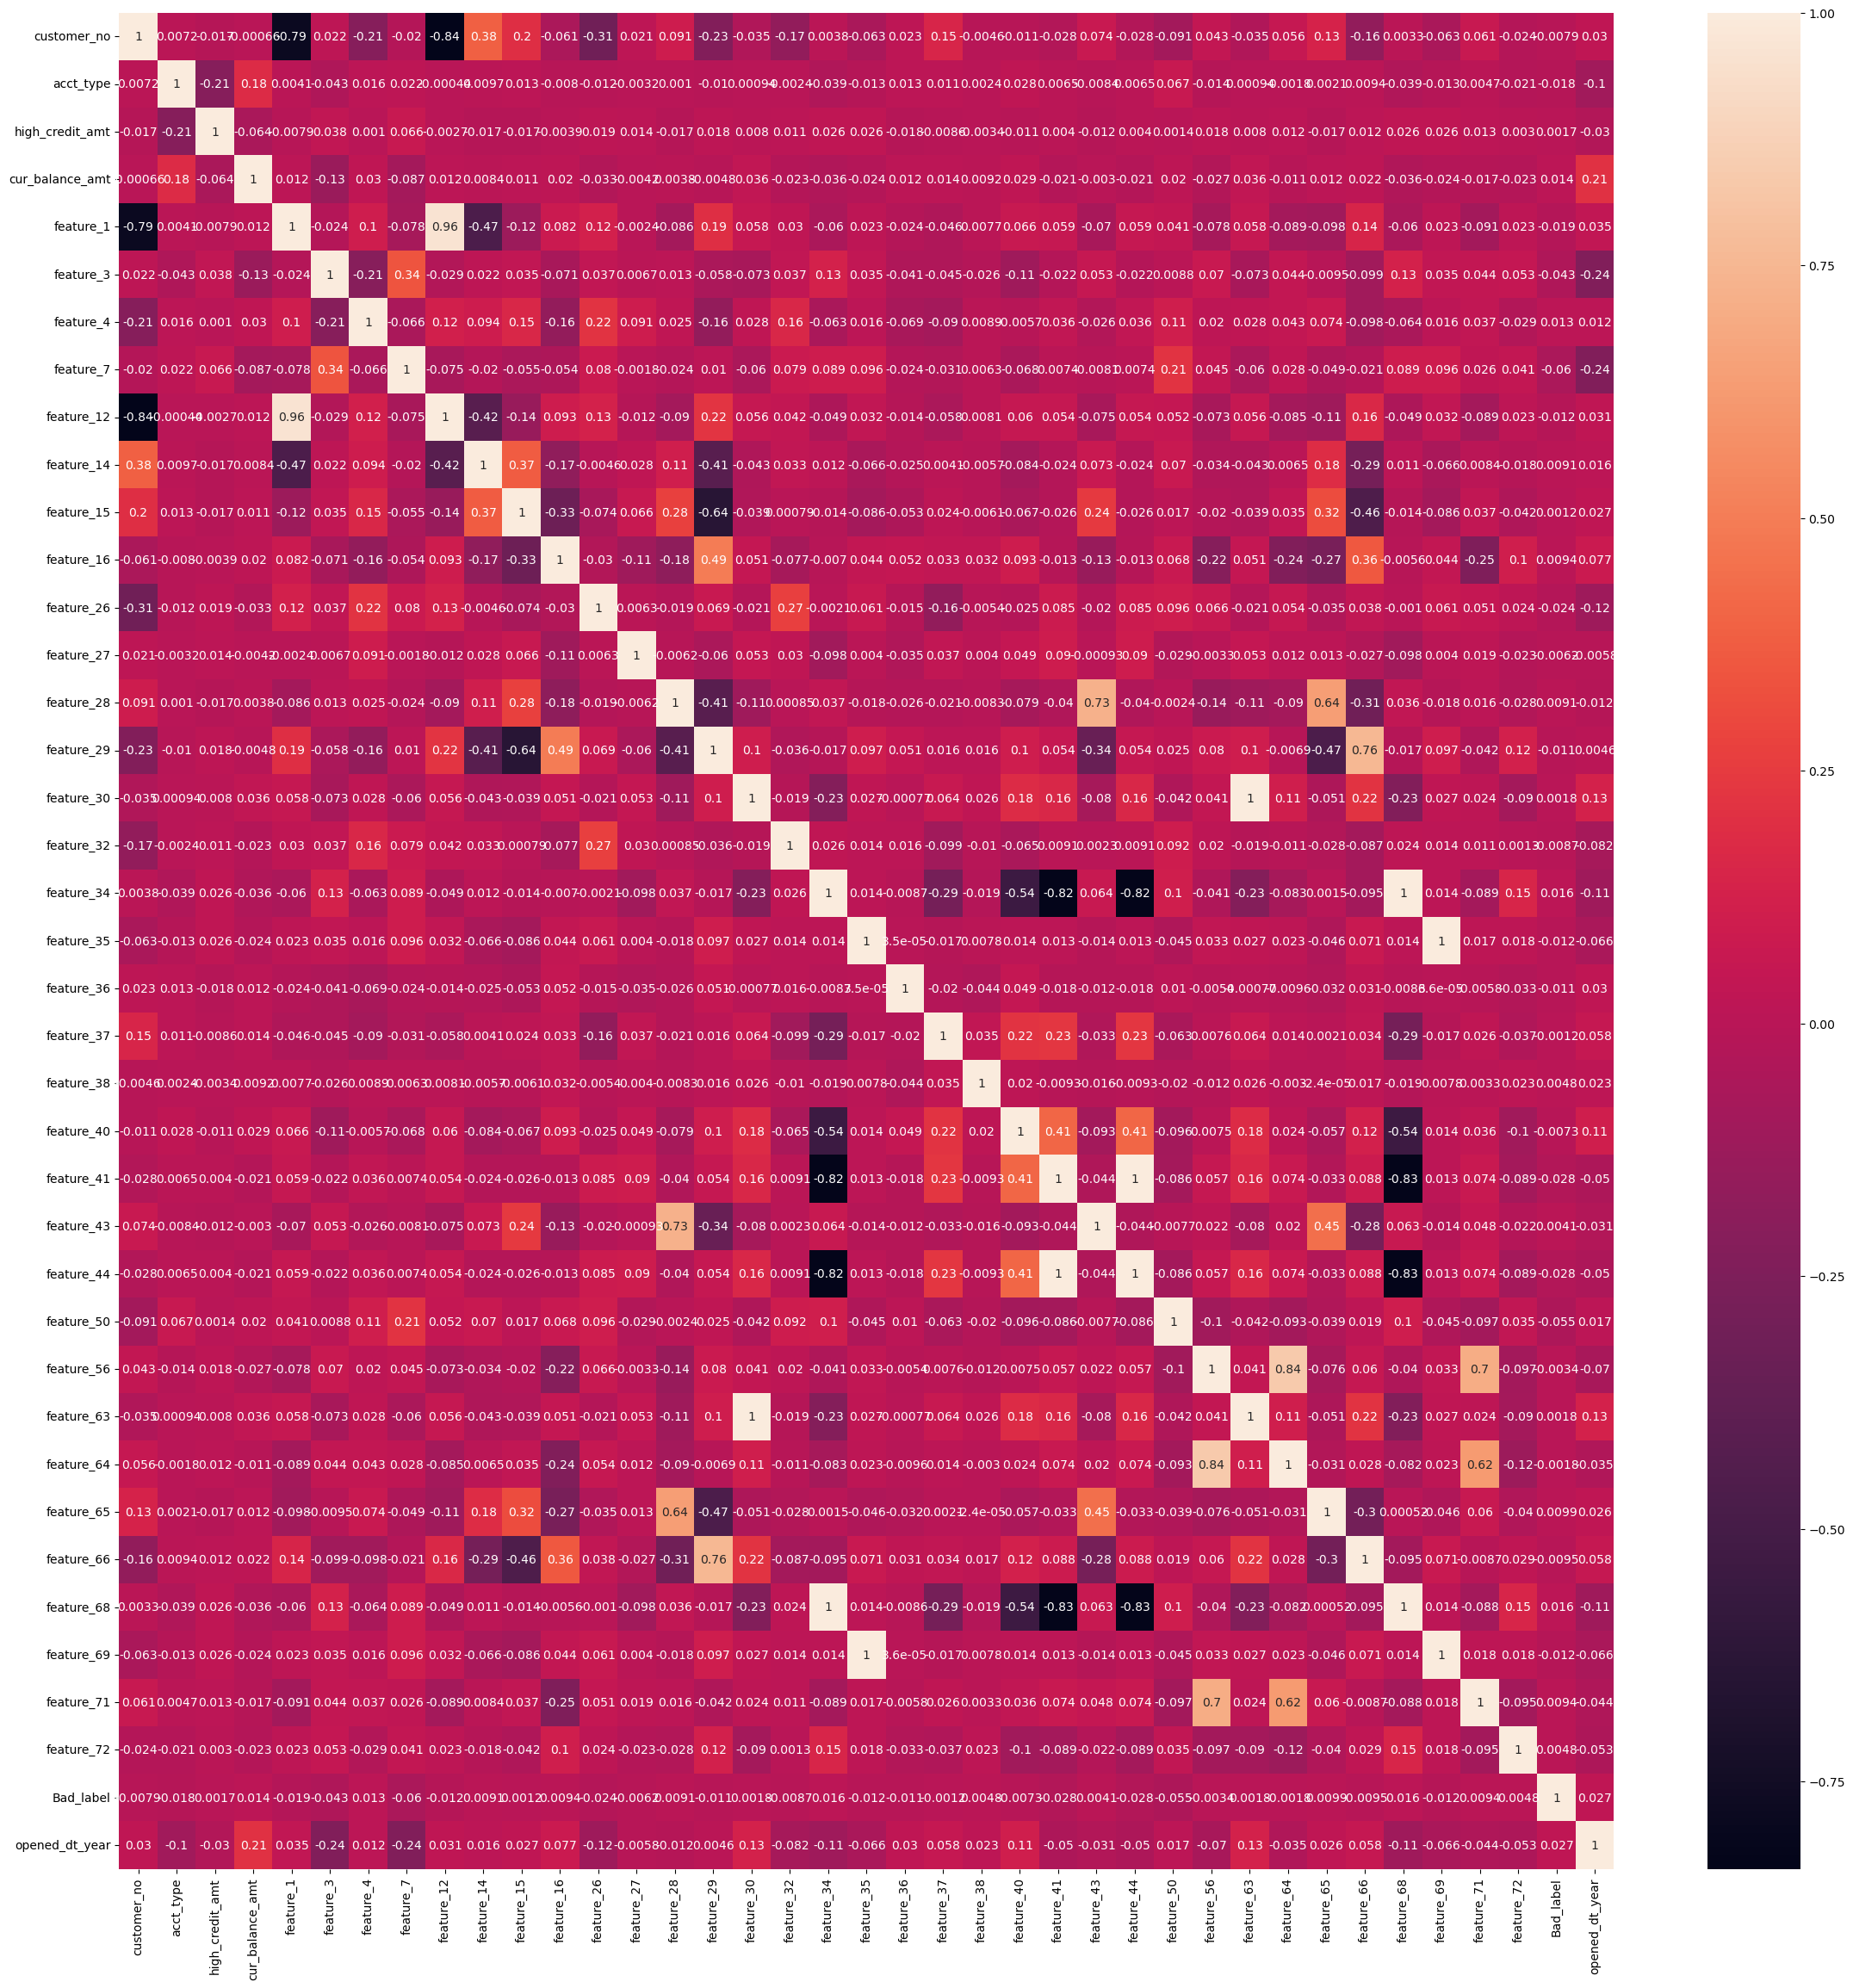

In [80]:
plt.figure(figsize=(28,28))#increase plot size
sns.heatmap(data.corr(),annot=True)#its show corelation between each and every columns by plot heatmap
#here we can see that every columns are connected to each other,So we can't remove any columns.

* feature_1 highly corelated with feature_12
* feature_30 highly corelated with feature_63
* feature_34 highly corelated with feature_68
* feature_35 highly corelated with feature_69
* feature_41 highly corelated with feature_44
* So, according to statistical way i'm going to drop one feature of them.

In [81]:
data.drop(["feature_1","feature_63","feature_68","feature_69","feature_41"],axis=1,inplace=True) # droping columns

<AxesSubplot:>

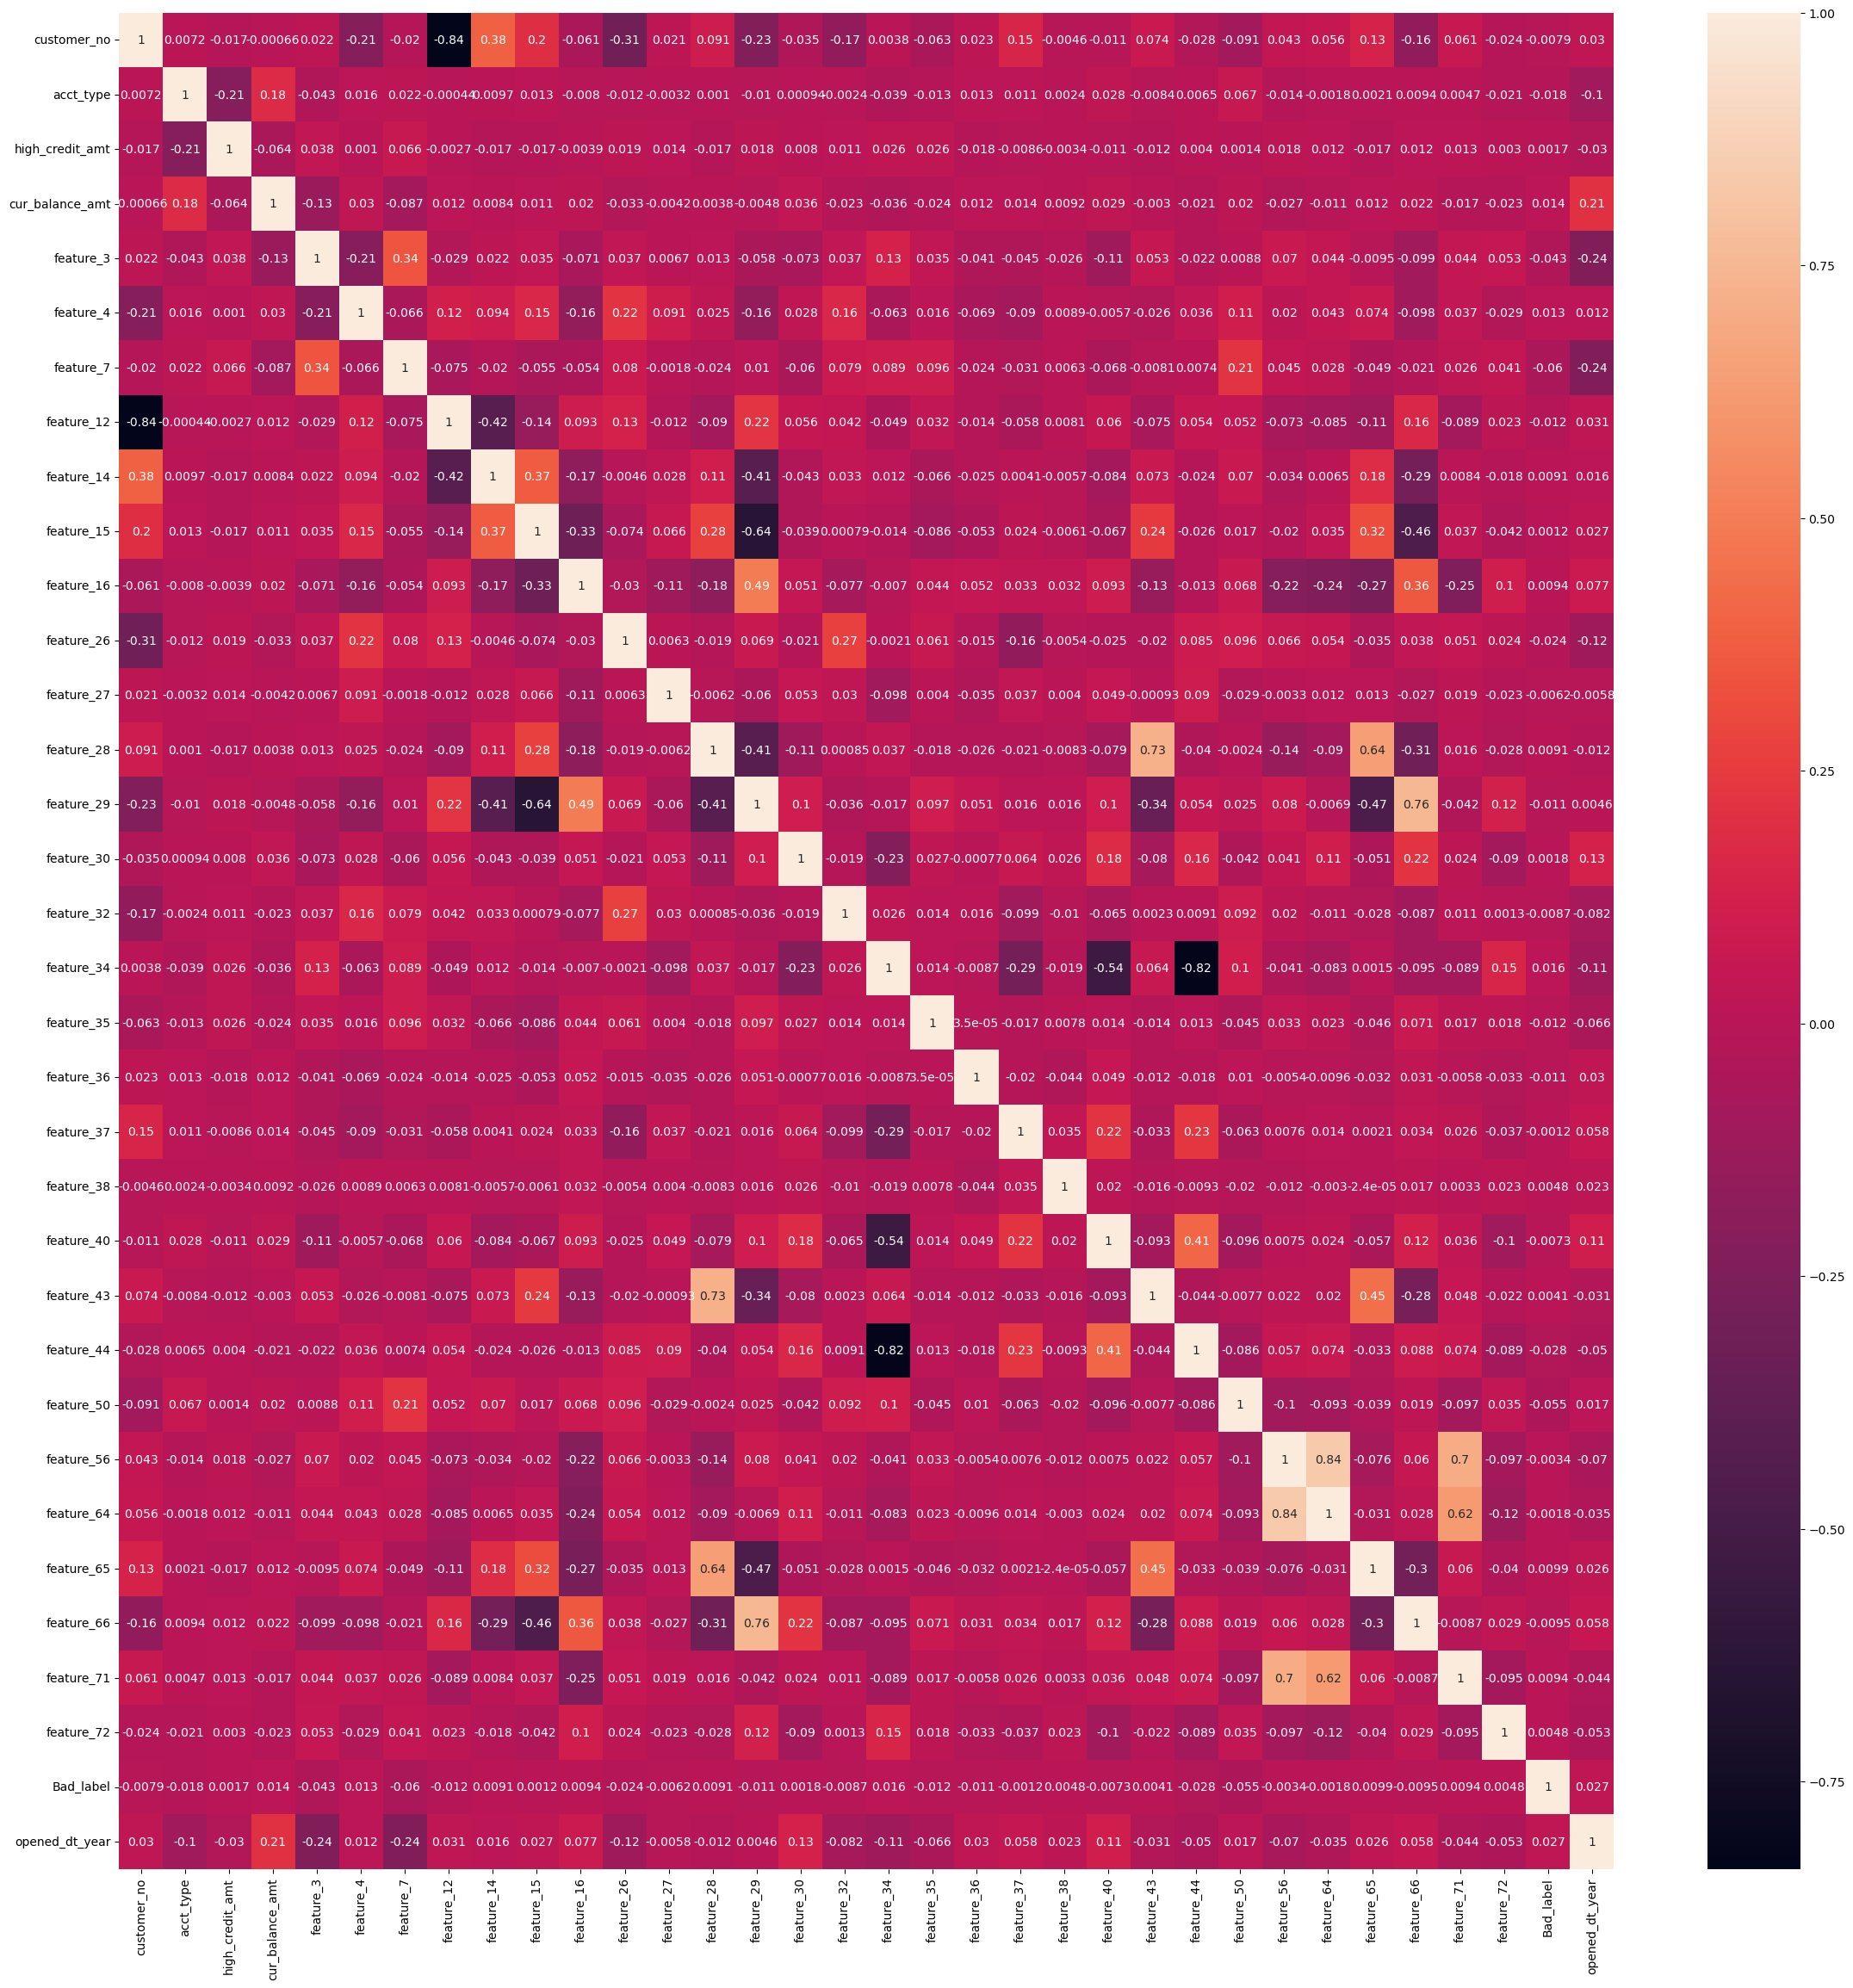

In [82]:
plt.figure(figsize=(28,28))#increase plot size
sns.heatmap(data.corr(),annot=True)

## Insights
* Finally we droped higly correlated columns,here there is no correlation then moving to next step

In [83]:
# Now selecting independent variable and dependent variables
x = data.drop("Bad_label",axis=1)
x

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_3  \
0          0.513245          6         0.069285         0.366569   0.339535   
1          0.513245         10         0.053707         0.491550   0.339535   
2          0.513245         10         0.136014         0.780605   0.339535   
3          0.653065         10         0.309882         0.366569   0.358140   
4          0.653065          6         0.067130         0.528960   0.358140   
...             ...        ...              ...              ...        ...   
186324     0.067378         10         0.080318         0.658006   0.632558   
186325     0.067378         10         0.064922         0.366569   0.632558   
186326     0.067378         10         0.168557         0.366569   0.632558   
186327     0.067378         10         0.117976         0.366569   0.632558   
186328     0.067378          6         0.086193         0.366569   0.632558   

        feature_4  feature_7  feature_12  feature_14  feature_15  feature_16  \
0               3   0.046015          10          12    0.834711    0.690979   
1               3   0.046015          10          12    0.834711    0.690979   
2               3   0.046015          10          12    0.834711    0.690979   
3               3   0.102712           7          12    0.887052    0.819578   
4               3   0.102712           7          12    0.887052    0.819578   
...           ...        ...         ...         ...         ...         ...   
186324          3   0.113394          14           0    0.327824    0.550864   
186325          3   0.113394          14           0    0.327824    0.550864   
186326          3   0.113394          14           0    0.327824    0.550864   
186327          3   0.113394          14           0    0.327824    0.550864   
186328          3   0.113394          14           0    0.327824    0.550864   

        feature_26  feature_27  feature_28  feature_29  feature_30  \
0                0           6          42    0.000096    0.823529   
1                0           6          42    0.000096    0.823529   
2                0           6          42    0.000096    0.823529   
3                2           8          18    0.018268    0.882353   
4                2           8          18    0.018268    0.882353   
...            ...         ...         ...         ...         ...   
186324           3           8          25    0.647605    0.607843   
186325           3           8          25    0.647605    0.607843   
186326           3           8          25    0.647605    0.607843   
186327           3           8          25    0.647605    0.607843   
186328           3           8          25    0.647605    0.607843   

        feature_32  feature_34  feature_35  feature_36  feature_37  \
0                2           1    0.002333           6           7   
1                2           1    0.002333           6           7   
2                2           1    0.002333           6           7   
3                4           1    0.006667           6           1   
4                4           1    0.006667           6           1   
...            ...         ...         ...         ...         ...   
186324           4           1    0.003053           6           1   
186325           4           1    0.003053           6           1   
186326           4           1    0.003053           6           1   
186327           4           1    0.003053           6           1   
186328           4           1    0.003053           6           1   

        feature_38  feature_40  feature_43  feature_44  feature_50  \
0         0.796362           1          28           4           0   
1         0.796362           1          28           4           0   
2         0.796362           1          28           4           0   
3         0.356588           1          21           2           0   
4         0.356588           1          21           2           0

In [84]:
y = data.Bad_label
y

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 183891, dtype: int64

In [85]:
#target variable are not balanced so we have to balanced this for avoiding overfitting and underfitting
data.Bad_label.value_counts()

0    177411
1      6480
Name: Bad_label, dtype: int64

# Model Creation :-

In [86]:
from sklearn.model_selection import train_test_split  # import train test split for spliting the data
# creating x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43) 

In [87]:
x_train

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_3  \
94442      0.368822          7         0.472419         0.366569   0.362791   
99901      0.746474          6         0.111057         0.366569   0.423256   
166664     0.258297         10         0.374619         0.366569   0.409302   
56672      0.778113         10         0.000666         0.366569   0.334884   
39390      0.615736          5         0.605029         0.366569   0.474419   
...             ...        ...              ...              ...        ...   
130612     0.482695          5         0.248640         0.366569   0.306977   
126694     0.511237          0         0.162112         0.366569   0.790698   
41151      0.223101          1         0.162112         0.366569   0.423256   
152766     0.429630         10         0.146007         0.366569   0.334884   
14259      0.550952          6         0.141226         0.765111   0.786047   

        feature_4  feature_7  feature_12  feature_14  feature_15  feature_16  \
94442           3   0.041085          10           0    0.975207    0.328215   
99901           3   0.083813           7          12    0.829201    0.255278   
166664          3   0.083813          10          12    0.600551    0.570058   
56672           2   0.054232           7          12    0.878788    0.775432   
39390           1   0.147905          10          12    0.911846    0.261036   
...           ...        ...         ...         ...         ...         ...   
130612          1   0.069844          10          12    0.451791    0.332054   
126694          1   0.123254          11           0    0.096419    0.666027   
41151           3   0.128184          14           0    0.600551    0.570058   
152766          2   0.069022          10          12    0.829201    0.257198   
14259           1   0.126541          10          12    0.878788    0.775432   

        feature_26  feature_27  feature_28  feature_29  feature_30  \
94442            2           8          12    0.813629    0.803922   
99901            0           8          42    0.000101    0.509804   
166664           2           8          39    0.481703    0.647059   
56672            0           5          23    0.019925    0.666667   
39390            0           5          42    0.000043    0.490196   
...            ...         ...         ...         ...         ...   
130612           2           9          12    0.813760    0.705882   
126694           3           5          39    0.481684    0.803922   
41151            0           3          39    0.498484    0.882353   
152766           0           5          23    0.019925    0.941176   
14259            0           5          42    0.000138    0.980392   

        feature_32  feature_34  feature_35  feature_36  feature_37  \
94442            2           1    0.003333           8           3   
99901            4           1    0.002667           8           1   
166664           4           2    0.030000           6           1   
56672            2           1    0.002487           8           1   
39390            4           1    0.002667           1           1   
...            ...         ...         ...         ...         ...   
130612           4           2    0.003467           6           1   
126694           4           1    0.006150           8           1   
41151            2           1    0.002667           6           1   
152766           3           1    0.002217           7           1   
14259            4           2    0.003333           6           1   

        feature_38  feature_40  feature_43  feature_44  feature_50  \
94442     0.483928           3          13          11           1   
99901     0.310138           7          47          10           1   
166664    0.464324           0          43           0           1   
56672     0.476687           1          47          11           0   
39390     0.963794           1          28           7           1

In [88]:
y_train

94442     0
99901     0
166664    0
56672     0
39390     0
         ..
130612    0
126694    0
41151     0
152766    0
14259     0
Name: Bad_label, Length: 137918, dtype: int64

In [89]:
x_test

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_3  \
168799     0.060096         10         0.582392         0.366569   0.786047   
77082      0.156895          6         0.026519         0.366569   0.558140   
35388      0.262440         13         0.145867         0.366569   0.460465   
112792     0.472860         10         0.088096         0.366569   0.544186   
97882      0.191923          6         0.053704         0.415286   0.465116   
...             ...        ...              ...              ...        ...   
98811      0.084118         10         0.000739         0.365655   0.246512   
21543      0.116259          1         0.270385         0.366569   0.627907   
115233     0.959489         10         0.054695         0.408911   0.334884   
7767       0.555053         10         0.161691         0.534998   0.446512   
162232     0.979954         10         0.002742         0.376529   0.488372   

        feature_4  feature_7  feature_12  feature_14  feature_15  feature_16  \
168799          3   0.093673          14          12    0.829201    0.249520   
77082           3   0.123254          14           0    0.719008    0.387716   
35388           1   0.113394          10           0    0.371901    0.383877   
112792          1   0.192276          10          12    0.517906    0.117083   
97882           3   0.082991          14           0    0.892562    0.393474   
...           ...        ...         ...         ...         ...         ...   
98811           3   0.069844          14          12    0.829201    0.257198   
21543           3   0.033689          14          12    0.829201    0.238004   
115233          2   0.055875           7          12    0.829201    0.268714   
7767            1   0.083813          10          12    0.523416    0.976967   
162232          1   0.083813           7          12    0.606061    0.788868   

        feature_26  feature_27  feature_28  feature_29  feature_30  \
168799           2           5          21    0.151102    0.921569   
77082            3           9          42    0.000123    0.705882   
35388            1           5          42    0.000156    0.862745   
112792           0           5          25    0.647581    0.137255   
97882            0           5          42    0.000095    0.980392   
...            ...         ...         ...         ...         ...   
98811            1           8          42    0.000028    0.921569   
21543            3           8          42    0.000096    0.607843   
115233           0           5          42    0.000151    0.882353   
7767             0           5          25    0.647606    0.372549   
162232           0           8           2    0.448423    0.980392   

        feature_32  feature_34  feature_35  feature_36  feature_37  \
168799           3           1    0.003025           6           1   
77082            3           1    0.009339           8           1   
35388            3           1    0.000000           6           1   
112792           4           1    0.003333           8           7   
97882            3           1    0.004333           8           1   
...            ...         ...         ...         ...         ...   
98811            4           1    0.000000           6           1   
21543            4           1    0.001783           0           1   
115233           2           1    0.002503           6           1   
7767             2           1    0.001900           6           7   
162232           3           1    0.002667           6           7   

        feature_38  feature_40  feature_43  feature_44  feature_50  \
168799    0.794242           9          47           8           0   
77082     0.821794           1          28          11           0   
35388     0.351289           1          47          11           1   
112792    0.464324           3          31          11           1   
97882     0.649594           4          47           8           0

In [90]:
y_test

168799    0
77082     0
35388     0
112792    0
97882     0
         ..
98811     0
21543     0
115233    0
7767      0
162232    0
Name: Bad_label, Length: 45973, dtype: int64

# Data Balancing

In [91]:
from imblearn.over_sampling import SMOTE  # assign SMOTE for handling unbalanced data
sm = SMOTE()

In [92]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)  # balancing data 

In [93]:
from collections import Counter  # checking data balanced or not
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 133054, 1: 4864})
Counter({0: 133054, 1: 133054})


# Model Selection

## LogisticRegression Model

* Logistic Regression is a statistical technique used for binary classification, where the goal is to predict whether an instance belongs to one of two classes (usually represented as 0 or 1). Despite its name, logistic regression is used for classification tasks, not regression tasks. It models the probability that an instance belongs to the positive class, making it a probabilistic algorithm.

**Here's a step-by-step explanation of how logistic regression works:**

**Sigmoid Function (Logistic Function):**

* Logistic regression uses the sigmoid function to map any real-valued number to a value between 0 and 1. This is essential for representing probabilities.

* Sigmoid Function: σ(z) = 1 / (1 + exp(-z))

* Here, z is a linear combination of the input features x and their corresponding weights θ, along with an intercept term b:

* z = θ₀ + θ₁ * x₁ + θ₂ * x₂ + ... + θₙ * xₙ

**Hypothesis Function:**

* The sigmoid function is applied to z to model the probability of the positive class given the input features:

* P(y=1 | x) = σ(z)

* This probability represents the likelihood that the instance belongs to the positive class.

**Cost Function (Log-Loss):**
* To train the logistic regression model, a cost function is defined. The log-loss (also known as cross-entropy loss) is commonly used for binary classification:

* Cost(y, y_pred) = -[y * log(y_pred) + (1 - y) * log(1 - y_pred)]

* Here, y is the true class label (0 or 1), and y_pred is the predicted probability from the sigmoid function.

**Optimization:**

* The goal during training is to minimize the average cost across all training examples. This is typically done using optimization algorithms like gradient descent.

**Gradient Descent:**

* Adjusts the weights and intercept iteratively to minimize the cost function. The gradient (derivative) of the cost function with respect to the weights is used to guide the updates.
**Parameter Interpretation:**

* The weights θ and the intercept b are learned during training. They represent the influence of each feature on the log-odds of the positive class.

* Logistic regression is used in various applications, including medical diagnosis, customer churn prediction, spam detection, and more. It's simple, interpretable, and serves as a baseline model for many classification problems. However, it assumes a linear relationship between features and the log-odds, and its performance may be limited for complex data distributions.


In [94]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_sm,y_sm)
y_pred1=model1.predict(x_test)

* In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is? For a regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

* Metrics In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values. In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted. The different metrics used for this purpose are:
* 1)Accuracy
* 2)Recall
* 3)Precision
* 4)F1 Score
* 5)Specifity
* 6)AUC( Area Under the Curve)
* 7)ROC(Receiver Operator Characteristic)
* 8)Classification Report


In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred1)
recall=recall_score(y_test,y_pred1,average='weighted')
precision=precision_score(y_test,y_pred1,average='weighted')
f1score=f1_score(y_test,y_pred1,average='weighted')
accuracy=accuracy_score(y_test,y_pred1)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[26812 17545]
 [  674   942]]
Recall: 0.6037021730145955
Precision: 0.9429804309071689
F1 Score: 0.7234626765332187
Accuracy: 0.6037021730145955


## DecisionTreeClassifier

* A Decision Tree is a popular and intuitive machine learning algorithm used for both classification and regression tasks. It models data as a tree-like structure of decisions and their possible consequences. Each internal node of the tree represents a decision based on a feature, and each leaf node represents a prediction or a class label.

**Here's how a Decision Tree works:**

**Selecting the Best Feature:**

* The algorithm starts by selecting the feature that best splits the data into different classes or reduces the variance of the target variable. The selection criterion is typically based on measures like Gini impurity, entropy, or mean squared error, depending on whether the task is classification or regression.

**Splitting the Data:**

* The selected feature is used to split the data into subsets. Each subset corresponds to a unique value of the selected feature.

**Repeating the Process:**

* The above steps are recursively applied to the subsets created at each internal node. The algorithm keeps selecting features that provide the best splits, and the tree continues to grow until a stopping criterion is met.

**Stopping Criteria:**

* The tree growth can be stopped based on various criteria, such as:

Maximum depth: The maximum number of levels the tree can have.
Minimum samples per leaf: The minimum number of samples required to create a leaf node.
Minimum samples per split: The minimum number of samples required to perform a split.
Leaf Node Assignments:
Once the tree is built, each leaf node is assigned a class label (in the case of classification) or a predicted value (in the case of regression). The majority class or the mean/median value of the target variable in the leaf node's subset is typically used.

**Prediction:*
* To make a prediction for a new instance, the instance is traversed down the tree from the root to a leaf node. The predicted class label or value of the leaf node is then used as the final prediction.

**Advantages of Decision Trees:**

* Intuitive: Decision Trees are easy to understand and visualize, making them useful for explaining decisions to non-experts.
* Non-parametric: They can capture complex relationships without assuming a specific functional form.
* Feature Importance: Decision Trees can provide insights into feature importance and feature interactions.

**Limitations of Decision Trees:**

* Prone to Overfitting: Without proper pruning or limiting growth, Decision Trees can become overly complex and overfit the training data.
**Instability:**
* Small changes in the data can lead to different tree structures, making them sensitive to variations.

**Bias towards Dominant Classes:**

* In classification, they can favor dominant classes if the dataset is imbalanced.
* To address some of the limitations, ensemble techniques like Random Forest and Gradient Boosting are often used, which combine multiple Decision Trees to improve performance and robustness.


In [96]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_sm,y_sm)
y_pred2=model2.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred2)
recall=recall_score(y_test,y_pred2,average='weighted')
precision=precision_score(y_test,y_pred2,average='weighted')
f1score=f1_score(y_test,y_pred2,average='weighted')
accuracy=accuracy_score(y_test,y_pred2)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[43286  1071]
 [  615  1001]]
Recall: 0.9633263002196941
Precision: 0.9683143300049583
F1 Score: 0.9654988058412031
Accuracy: 0.9633263002196941


## RandomForestClassifier

* Random Forest is a powerful ensemble learning technique that combines multiple individual decision trees to create a more accurate and robust predictive model. It's commonly used for classification and regression tasks, offering improved performance over single decision trees by mitigating their limitations.

**Here's how Random Forest works:**

**Bootstrap Aggregating (Bagging):**

* Random Forest employs a technique called bagging, where multiple subsets of the training data are created through random sampling with replacement. Each subset is used to train a separate decision tree. This introduces diversity in the training data, reducing the likelihood of overfitting.


**Random Feature Selection:**

* In addition to using random subsets of data, Random Forest introduces randomness in feature selection during the construction of each individual tree. At each split, the algorithm considers only a subset of features, rather than all features. This helps to decorrelate the trees and improve generalization.

**Building Multiple Trees:**

* The Random Forest algorithm builds a specified number of decision trees using the bootstrapped subsets of data and the random feature subsets. Each decision tree is built using the standard Decision Tree algorithm (e.g., using Gini impurity or entropy for classification, or mean squared error for regression).

**Voting or Averaging:**

* For classification tasks, the final prediction of the Random Forest is determined through a majority vote among the individual decision trees. For regression tasks, predictions are averaged across the trees.

**Advantages of Random Forest:**

**Reduced Overfitting:**
* By aggregating multiple trees and introducing randomness, Random Forest reduces overfitting compared to individual decision trees.

**Robustness:**

* Random Forest is less sensitive to outliers and noise in the data due to its ensemble nature.

**Feature Importance:**

* Random Forest provides a measure of feature importance, indicating which features have the most impact on predictions.

**Non-linearity:**

* It can capture complex relationships and interactions in the data, making it suitable for a wide range of tasks.

**Limitations of Random Forest:**

**Complexity:**

* The ensemble of trees can be computationally expensive and may require tuning of hyperparameters.

**Interpretability:**

* While Random Forest can provide feature importance, interpreting the combined effect of multiple trees can be challenging.
* Random Forest is widely used across various domains, including finance, healthcare, natural language processing, and image analysis. Its ability to handle complex data and mitigate overfitting makes it a valuable tool in machine learning.






In [98]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_sm,y_sm)
y_pred3=model3.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred3)
recall=recall_score(y_test,y_pred3,average='weighted')
precision=precision_score(y_test,y_pred3,average='weighted')
f1score=f1_score(y_test,y_pred3,average='weighted')
accuracy=accuracy_score(y_test,y_pred3)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[44340    17]
 [  363  1253]]
Recall: 0.9917342788158267
Precision: 0.9916946493383136
F1 Score: 0.9912548500483873
Accuracy: 0.9917342788158267


## XGBRFClassifier

* XGBRFClassifier is a classifier based on the XGBoost algorithm that is specifically designed to work with random forests. XGBoost (Extreme Gradient Boosting) is a popular and powerful machine learning algorithm known for its performance and versatility in both classification and regression tasks. While XGBoost typically utilizes boosted trees, the XGBRFClassifier is a variation that focuses on the random forest ensemble structure. It is part of the XGBoost library and offers benefits similar to traditional random forest classifiers but with some enhancements from the XGBoost framework.

**Here's a breakdown of the key features and aspects of the XGBRFClassifier:**

**Ensemble Structure:**

* The XGBRFClassifier constructs an ensemble of decision trees, similar to traditional random forest classifiers. However, it leverages the techniques and optimizations of the XGBoost framework.

**Gradient Boosting Principles:**

* While the XGBRFClassifier uses random forest-style decision trees, it still benefits from some of the boosting principles of XGBoost. This includes gradient boosting, which iteratively improves the model by focusing on correcting the mistakes of previously added trees.

**Tree Building Process:**

* The classifier constructs decision trees using a random subset of features and a subset of the training data (bootstrap aggregation or bagging). This helps to introduce diversity and reduce overfitting.

**Regularization and Pruning:**

* Like XGBoost, the XGBRFClassifier applies regularization techniques to prevent overfitting. It also supports early stopping to avoid constructing too many trees that may not improve the model's performance.

**Hyperparameter Tuning:**

* The XGBRFClassifier comes with a variety of hyperparameters that can be tuned to optimize its performance for specific tasks. These hyperparameters control aspects like the depth of trees, learning rate, subsampling ratio, and more.

**Parallel and Distributed Computing:**

* The XGBoost library is designed to efficiently use parallel and distributed computing resources. This can lead to faster training times and improved scalability.

**Feature Importance and Visualization:**

* XGBRFClassifier provides tools for assessing feature importance, enabling you to understand which features contribute the most to the model's predictions.

* The XGBRFClassifier is particularly useful when you want to harness the benefits of both random forest-style ensembles and the optimizations and regularization techniques provided by XGBoost. It can be applied to a wide range of classification tasks, including those with complex relationships and high-dimensional data.






In [100]:

from xgboost import XGBRFClassifier
model4=XGBRFClassifier() ##n_estimators = 500, seed = 123
model4.fit(x_sm,y_sm)
y_pred4=model4.predict(x_test)

In [101]:
cm=confusion_matrix(y_test,y_pred4)
recall=recall_score(y_test,y_pred4,average='weighted')
precision=precision_score(y_test,y_pred4,average='weighted')
f1score=f1_score(y_test,y_pred4,average='weighted')
accuracy=accuracy_score(y_test,y_pred4)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[34335 10022]
 [  888   728]]
Recall: 0.7626867944228134
Precision: 0.9429047827688881
F1 Score: 0.836711976112238
Accuracy: 0.7626867944228134


## GradientBoostingClassifier

* The GradientBoostingClassifier is a powerful and popular machine learning algorithm used for classification tasks. It is part of the gradient boosting family of algorithms, which are designed to improve the predictive accuracy of models by combining the predictions of multiple weak learners (typically decision trees) in an additive manner. The GradientBoostingClassifier is implemented in scikit-learn and is based on the gradient boosting framework.

**Here's an explanation of the key concepts and features of the GradientBoostingClassifier:**

**Gradient Boosting Framework:**

* Gradient boosting is an ensemble learning technique that builds an additive model in a forward stage-wise manner. Each stage constructs a new weak learner that corrects the errors made by the previous stage.

**Weak Learners (Decision Trees):**

* The base learners in the GradientBoostingClassifier are often shallow decision trees, also known as weak learners. These trees have limited depth and can be thought of as simple rules applied to the data.

**Boosting Iterations:**

* The algorithm performs a series of boosting iterations. At each iteration, a new decision tree is added to the ensemble to correct the mistakes made by the existing ensemble.

**Residuals and Gradient Descent:**

* The new tree is fitted to the negative gradient of the loss function with respect to the current predictions. This guides the tree construction to reduce the errors of the previous predictions.

**Learning Rate:**

* A learning rate parameter controls the contribution of each new tree to the ensemble. A lower learning rate can prevent overfitting by shrinking the impact of each new tree.

**Regularization:**

* The GradientBoostingClassifier employs regularization techniques to prevent overfitting, such as controlling the depth of the trees and using a minimum number of samples per leaf.

**Subsampling:**

* Random subsampling of the data can be applied to each boosting iteration to introduce randomness and improve generalization.

**Feature Importance:**

* The algorithm provides a measure of feature importance based on how often features are used in decision trees and how much they contribute to reducing the loss.

**Early Stopping:**

* To avoid overfitting, the algorithm can be stopped early based on the performance on a validation set. This prevents adding too many trees that may lead to overfitting.

* The GradientBoostingClassifier is effective for a wide range of classification tasks, including both binary and multi-class problems. It can capture complex relationships in data and often achieves competitive performance compared to other advanced algorithms. However, it may require tuning of hyperparameters to achieve optimal performance and to prevent overfitting.




In [102]:
from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier()
model5.fit(x_sm,y_sm)
y_pred5=model5.predict(x_test)

In [103]:
cm=confusion_matrix(y_test,y_pred5)
recall=recall_score(y_test,y_pred5,average='weighted')
precision=precision_score(y_test,y_pred5,average='weighted')
f1score=f1_score(y_test,y_pred5,average='weighted')
accuracy=accuracy_score(y_test,y_pred5)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[41565  2792]
 [ 1282   334]]
Recall: 0.9113827681465207
Precision: 0.939735997259325
F1 Score: 0.9247247713116189
Accuracy: 0.9113827681465207


## MLPClassifier -ANN

* MLPClassifier is a type of ANN (Artificial Neural Network). It is a multilayer perceptron (MLP) classifier, which is a feedforward neural network that can be used for classification tasks.

* An MLP consists of multiple layers of neurons, each layer is fully connected to the following one. The neurons in the input layer receive the input data, and the neurons in the output layer produce the output predictions. The neurons in the hidden layers perform the intermediate computations.

* The MLPClassifier class in scikit-learn implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. It can be used for both binary and multi-class classification tasks.

* The MLPClassifier class has the following parameters:

              hidden_layer_sizes: A list of the number of neurons in each hidden layer.
              activation: The activation function for the hidden layers.
              solver: The algorithm used to train the model.
              alpha: The learning rate.
              max_iter: The maximum number of iterations.
              random_state: The random seed.

In [104]:

from sklearn.neural_network import MLPClassifier
model6= MLPClassifier( hidden_layer_sizes=(100,50,2), activation='relu',solver='adam',
                       learning_rate_init=0.0001,
                       max_iter=150,random_state=78) ## model object creation max_iter=Stopping parameter
model6.fit(x_sm,y_sm) ## training the data
y_pred6=model6.predict(x_test)

In [105]:
cm=confusion_matrix(y_test,y_pred6)
recall=recall_score(y_test,y_pred6,average='weighted')
precision=precision_score(y_test,y_pred6,average='weighted')
f1score=f1_score(y_test,y_pred6,average='weighted')
accuracy=accuracy_score(y_test,y_pred6)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[38604  5753]
 [  253  1363]]
Recall: 0.8693581014943553
Precision: 0.965299592269933
F1 Score: 0.9061842568635962
Accuracy: 0.8693581014943553


## Cross Validation in All Algorithms
* Cross-validation is a fundamental technique in machine learning used to evaluate the performance of algorithms and models, as well as to tune hyperparameters and assess their generalization ability. It involves splitting the dataset into multiple subsets to simulate different training and testing scenarios, helping to ensure that the model's performance is representative and reliable.

In [106]:
list_of_models=[model1,model2,model3,model4,model5,model6]

In [107]:
from sklearn.model_selection import cross_val_score
accuracy_cvs=[]
for i in list_of_models:
    cvs=cross_val_score(i,x,y,cv=5,scoring='accuracy')
    p=cvs.mean()
    accuracy_cvs.append(p)
accuracy_cvs   

[0.9647617338490383,
 0.9197187556480924,
 0.9648487420910371,
 0.9642831880744742,
 0.9629291245077429,
 0.9582959507766567]

In [108]:
names_of_algorithms=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBRFClassifier','GradientBoostingClassifier','MLPClassifier']

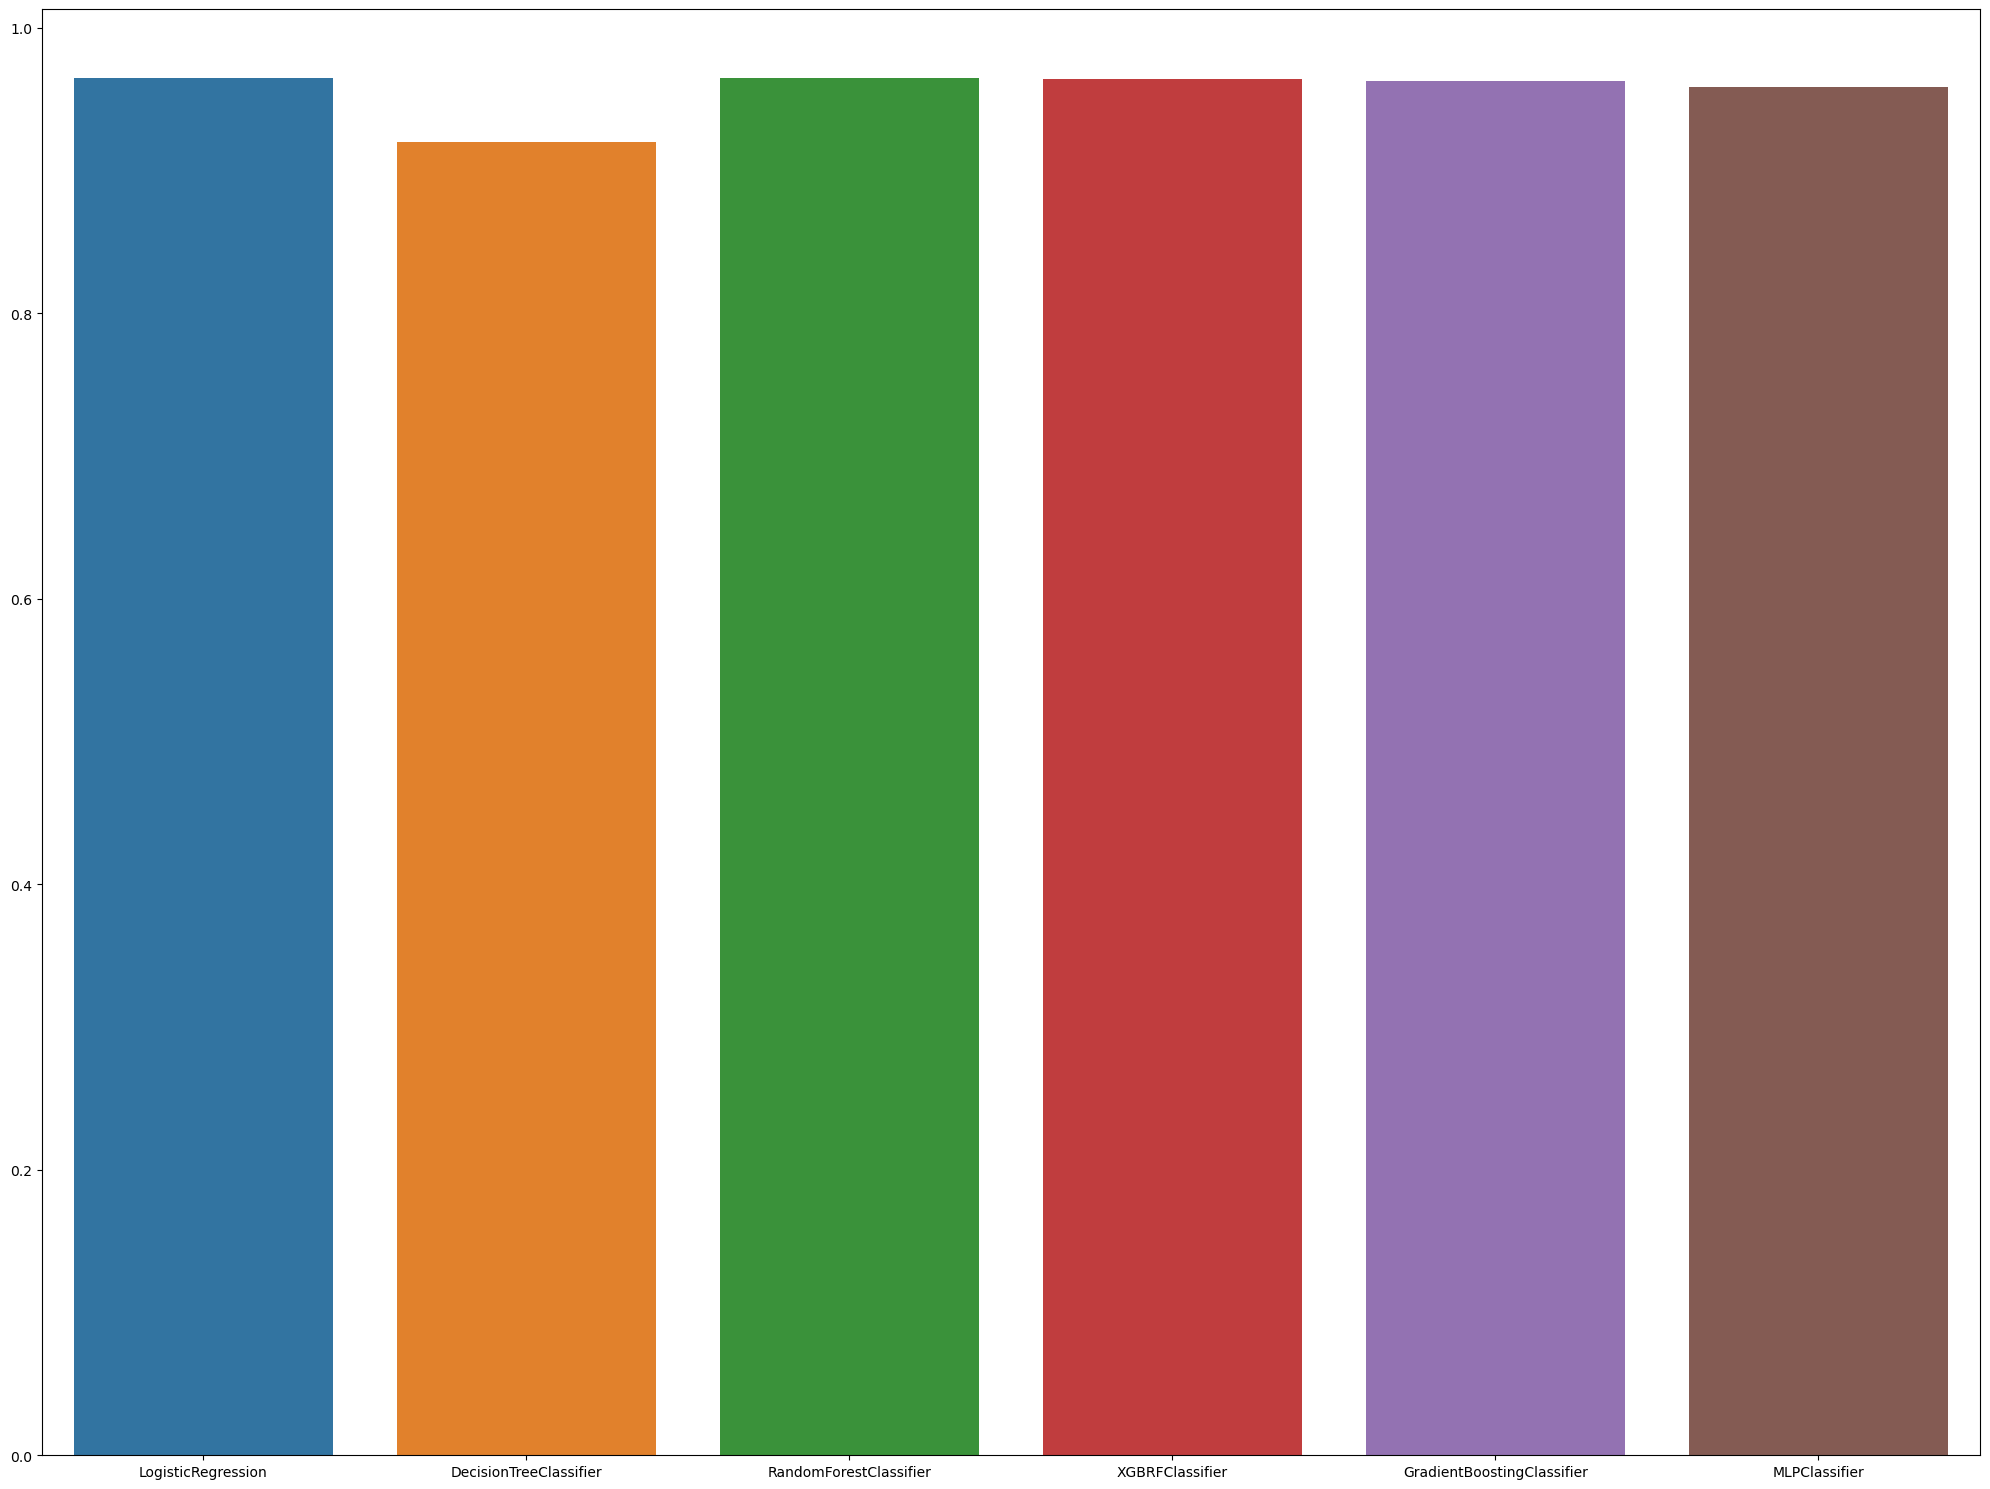

In [109]:
plt.figure(figsize=(20,15))
sns.barplot(x=names_of_algorithms,y=accuracy_cvs)
plt.tight_layout()

**Finalizing the algorithm**

* Among all algorithms "GradientBoostingClassifier"aves the more accuracy.So finalized algorithm is radientBoostingClassifier

In [110]:
import pickle as pkl
pkl.dump(model3,open("mobile.pkl","wb"))
read=pkl.load(open("mobile.pkl","rb"))

In [111]:
independent_input_data=[0.258297,10,0.374619,0.366569,0.409302,3,0.083813,10,12,0.600551,0.570058,2,8,39,0.481703,0.647059,4,2,0.030000,6,1,0.464324,0,43,0,1,21,21,15,0.379517,21,1,0.888889]
e=read.predict([independent_input_data])[0]

In [112]:
print(e)

0


In [113]:
x_train


customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_3  \
94442      0.368822          7         0.472419         0.366569   0.362791   
99901      0.746474          6         0.111057         0.366569   0.423256   
166664     0.258297         10         0.374619         0.366569   0.409302   
56672      0.778113         10         0.000666         0.366569   0.334884   
39390      0.615736          5         0.605029         0.366569   0.474419   
...             ...        ...              ...              ...        ...   
130612     0.482695          5         0.248640         0.366569   0.306977   
126694     0.511237          0         0.162112         0.366569   0.790698   
41151      0.223101          1         0.162112         0.366569   0.423256   
152766     0.429630         10         0.146007         0.366569   0.334884   
14259      0.550952          6         0.141226         0.765111   0.786047   

        feature_4  feature_7  feature_12  feature_14  feature_15  feature_16  \
94442           3   0.041085          10           0    0.975207    0.328215   
99901           3   0.083813           7          12    0.829201    0.255278   
166664          3   0.083813          10          12    0.600551    0.570058   
56672           2   0.054232           7          12    0.878788    0.775432   
39390           1   0.147905          10          12    0.911846    0.261036   
...           ...        ...         ...         ...         ...         ...   
130612          1   0.069844          10          12    0.451791    0.332054   
126694          1   0.123254          11           0    0.096419    0.666027   
41151           3   0.128184          14           0    0.600551    0.570058   
152766          2   0.069022          10          12    0.829201    0.257198   
14259           1   0.126541          10          12    0.878788    0.775432   

        feature_26  feature_27  feature_28  feature_29  feature_30  \
94442            2           8          12    0.813629    0.803922   
99901            0           8          42    0.000101    0.509804   
166664           2           8          39    0.481703    0.647059   
56672            0           5          23    0.019925    0.666667   
39390            0           5          42    0.000043    0.490196   
...            ...         ...         ...         ...         ...   
130612           2           9          12    0.813760    0.705882   
126694           3           5          39    0.481684    0.803922   
41151            0           3          39    0.498484    0.882353   
152766           0           5          23    0.019925    0.941176   
14259            0           5          42    0.000138    0.980392   

        feature_32  feature_34  feature_35  feature_36  feature_37  \
94442            2           1    0.003333           8           3   
99901            4           1    0.002667           8           1   
166664           4           2    0.030000           6           1   
56672            2           1    0.002487           8           1   
39390            4           1    0.002667           1           1   
...            ...         ...         ...         ...         ...   
130612           4           2    0.003467           6           1   
126694           4           1    0.006150           8           1   
41151            2           1    0.002667           6           1   
152766           3           1    0.002217           7           1   
14259            4           2    0.003333           6           1   

        feature_38  feature_40  feature_43  feature_44  feature_50  \
94442     0.483928           3          13          11           1   
99901     0.310138           7          47          10           1   
166664    0.464324           0          43           0           1   
56672     0.476687           1          47          11           0   
39390     0.963794           1          28           7           1

In [114]:
data.iloc[166664]

customer_no          0.652814
acct_type           10.000000
high_credit_amt      0.098125
cur_balance_amt      0.366557
feature_3            0.334884
feature_4            2.000000
feature_7            0.115037
feature_12           7.000000
feature_14          12.000000
feature_15           0.829201
feature_16           0.255278
feature_26           2.000000
feature_27           8.000000
feature_28          43.000000
feature_29           0.151600
feature_30           0.941176
feature_32           3.000000
feature_34           1.000000
feature_35           0.002994
feature_36           7.000000
feature_37           1.000000
feature_38           0.870540
feature_40           9.000000
feature_43          48.000000
feature_44           9.000000
feature_50           0.000000
feature_56          33.000000
feature_64          10.000000
feature_65         157.000000
feature_66           0.000124
feature_71          33.000000
feature_72           0.000000
Bad_label            0.000000
opened_dt_

## Conclusion

In conclusion, Bank GoodCredit appears to have a promising project on its hands. The bank's strategy is aligned with industry trends and market demands, and it has taken steps to mitigate potential risks and challenges. The project's focus on innovation and technology positions it well for future growth and competitiveness in the banking sector.

Bank GoodCredit's commitment to market analysis, financial projections, and compliance with regulatory requirements showcases a comprehensive approach to project planning. Additionally, its emphasis on marketing and customer acquisition indicates a strong intent to build a robust customer base.

However, the ultimate success of the project will depend on its execution, the effectiveness of the team, and the dynamic nature of the banking industry. Continuous monitoring and adaptation to changing market conditions will be crucial for achieving the projected financial goals and maintaining a positive reputation among customers and stakeholders.

It's important to note that this conclusion is based on a general hypothetical scenario. For a more accurate and detailed conclusion, specific project details and data would be required.
